In [1]:
# !pip install -U scikit-learn scipy matplotlib

In [2]:
import collections
import torch
import torch.nn as nn
from torch.utils.data import TensorDataset
import numpy as np
from sklearn.neighbors import NearestNeighbors
import time
import os

C:\Users\Research6\.conda\envs\pytorch\lib\site-packages\tqdm\auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [3]:
# !conda env list

In [4]:
# !conda activate tf

In [5]:
from keras import backend as K  
from keras.models import Model 
from keras.datasets import cifar10
import numpy as np  
import tensorflow as tf  
import os  
from glob import glob   
import time  
from PIL import Image  
import shutil
from collections import Counter

In [6]:
# !pip install seaborn

In [7]:
# !pip install tensorflow

In [8]:
import tensorflow as tf
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt 

from random import randint

In [9]:
import tensorflow.keras.backend as K
def f1_metric(y_true, y_pred):
    true_positives = K.sum(K.round(K.clip(y_true * y_pred, 0, 1)))
    possible_positives = K.sum(K.round(K.clip(y_true, 0, 1)))
    predicted_positives = K.sum(K.round(K.clip(y_pred, 0, 1)))
    precision = true_positives / (predicted_positives + K.epsilon())
    recall = true_positives / (possible_positives + K.epsilon())
    f1_val = 2*(precision*recall)/(precision+recall+K.epsilon())
    return f1_val

In [10]:
pwd

'C:\\Users\\Research6\\Desktop\\conf\\covid smote\\train'

In [11]:
#Train Paths
covid_paths = glob('C:/Users/Research6/Desktop/conf/covid smote/train/Covid/**')
print(len(covid_paths))
Normal_paths = glob('C:/Users/Research6/Desktop/conf/covid smote/train/Normal/**')
print(len(Normal_paths))
ViralPneumonia_paths = glob('C:/Users/Research6/Desktop/conf/covid smote/train/Viral Pneumonia/**')
print(len(ViralPneumonia_paths))

111
70
70


In [12]:
#Test Paths
covid_test_paths = glob('C:/Users/Research6/Desktop/conf/covid smote/test/Covid/**')
print(len(covid_test_paths))
Normal_test_paths = glob('C:/Users/Research6/Desktop/conf/covid smote/test/Normal/**')
print(len(Normal_test_paths))
ViralPneumonia_test_paths = glob('C:/Users/Research6/Desktop/conf/covid smote/test/Viral Pneumonia/**')
print(len(ViralPneumonia_test_paths))

26
20
20


In [13]:
Classes = 3
# LR = 0.003 
# LR = 0.000001
# LR =  1e-07
min_working_no = Classes * 300   
min_for_other_classes = min_working_no//4
# min_working_no = min_working_no//2
print(min_working_no)  
training_images_required = 750 
print(training_images_required) 
min_working_no2 = 1000  
epoch = 100
experiment_Name = "Smote_1_covid"

900
750


In [14]:
image_dimensions = 32
import cv2 
data_train = [] 
label_train = [] 
# number_of_images
# for c,n,v in zip(covid_paths,Normal_paths,ViralPneumonia_paths):
for c in (covid_paths):
  data_train.append(cv2.resize(cv2.imread(c),(image_dimensions,image_dimensions)))
  label_train.append(0)
for n in (Normal_paths):    
  data_train.append(cv2.resize(cv2.imread(n),(image_dimensions,image_dimensions)))
  label_train.append(1)
for v in (ViralPneumonia_paths):
  data_train.append(cv2.resize(cv2.imread(v),(image_dimensions,image_dimensions)))
  label_train.append(2)

In [15]:
len(data_train)

251

In [16]:
len(covid_paths + Normal_paths + ViralPneumonia_paths )

251

In [17]:
image_dimensions = 32
import cv2 
data_test = [] 
label_test = [] 
# number_of_images
for c in (covid_test_paths):
  data_test.append(cv2.resize(cv2.imread(c),(image_dimensions,image_dimensions)))
  label_test.append(0)
for n in (Normal_test_paths):    
  data_test.append(cv2.resize(cv2.imread(n),(image_dimensions,image_dimensions)))
  label_test.append(1)
for v in (ViralPneumonia_test_paths):
  data_test.append(cv2.resize(cv2.imread(v),(image_dimensions,image_dimensions)))
  label_test.append(2)
    
# for c,n,v,_ in zip(covid_test_paths,Normal_test_paths,ViralPneumonia_test_paths,range(len(covid_test_paths))):
#   data_test.append(cv2.resize(cv2.imread(c),(image_dimensions,image_dimensions)))
#   label_test.append(0)
#   data_test.append(cv2.resize(cv2.imread(n),(image_dimensions,image_dimensions)))
#   label_test.append(1)
#   data_test.append(cv2.resize(cv2.imread(v),(image_dimensions,image_dimensions)))
#   label_test.append(2)

In [18]:
# x_train = data_train[:len(data_train)//2]
# y_train =  label_train[:len(label_train)//2]

# x_test = data_train[len(data_train)//2:]
# y_test =  label_train[len(label_train)//2:]
x_train = data_train[:]
y_train =  label_train[:]

x_test = data_test[:]
y_test =  label_test[:]

In [19]:
len(x_train)

251

In [20]:
len(x_test)

66

In [21]:
import random

c = list(zip(x_train, y_train))
random.shuffle(c)
x_train, y_train = zip(*c)
 
c = list(zip(x_test, y_test))
random.shuffle(c)
x_test, y_test = zip(*c)

In [22]:
label_list = [i for i in range(Classes)]
label_list

[0, 1, 2]

In [23]:
newDataTrain = []
newLabelTrain = []
for data,label in zip(x_train,y_train):
  if(label in label_list):
    newDataTrain.append(data)
    newLabelTrain.append(label)

In [24]:
len(newDataTrain)

251



# Create Biased Data


One Big others small

In [25]:
# listofList = {}
# for x in label_list:
#   listofList[x] = []

# num = 0
# toNum = int(min_working_no/Classes)
# flag = True 
# # print(toNum)
# doneList = []
# bigClass = 0
# miner = 2
# # randint(1,Classes-1)
# print("Big Class >> ",bigClass)
# for l in label_list:
#   num = 0 
#   for x,y in zip(newDataTrain[:],newLabelTrain[:]):
#   # for Cifar10 Dataset
#     # y = y[0]
#     if(y == bigClass and num<toNum ):
#       miner += 2
#       lessThan = randint(0,min_for_other_classes )- miner
      
#           # print(lessThan)
#       if(doneList.count(y) <= lessThan):
#         listofList[y].append(x)
#         num+=1 
#     elif(y == l and num < toNum ):
         
#         if(y in doneList):
#           lessThan = randint(0,min_for_other_classes)
#           # print(lessThan)
#           # if(doneList.count(y) <= lessThan):
#           doneList.append(y)
#           listofList[y].append(x)
       
#         else:
#           doneList.append(y)
#           listofList[y].append(x)

#         num+=1
#         # flag == False

One small others big

In [26]:

# listofList = {}
# for x in label_list:
#   listofList[x] = []

# num = 0
# toNum = int(min_working_no/Classes)
# flag = True 
# # print(toNum)
# doneList = []
# smallClass = randint(0,Classes-1)//10
# print("Small Class >> ",smallClass)

# # toNumSmall = 3
# # toNum = 10

# for l in label_list:
#   num = 0  
#   numSmall = 0        
#   toNumSmall = randint(1, min_for_other_classes)
#   for x,y in zip(newDataTrain[:],newLabelTrain[:]):
#     if( l == smallClass and l ==y   and numSmall < toNumSmall):
#       listofList[y].append(x)
#       numSmall+=1  
#       if(numSmall >= toNumSmall): break
#     elif(l == y and num <= toNum):
#       listofList[y].append(x)
#       num+=1 
#       if(num >= toNum ): break


In [27]:







# total = 0
# string = "" 
# for x in listofList : 
#   total+=len(listofList[x])
#   string = string+str(len(listofList[x])) + "|"
#   print("Label >> ",x)
#   print("Data points >>",len(listofList[x]))

# print("Total >> ",total)

dereasee by half

In [28]:
# listofList = {}
# for x in label_list:
#   listofList[x] = []

# num = 0
# toNum = int(min_working_no/Classes)*2
# print(toNum)
# for l in label_list:
#   num = 0
#   toNum = toNum/1.5
#   if toNum < 6:   
#         toNum = 6
    
    
#   for x,y in zip(newDataTrain[:],newLabelTrain[:]):
# #     y = y[0]  # for Cifar 10 only
#     if(y == l and num < toNum):
#         listofList[y].append(x)
#         num+=1

**SKEW** : Divide by 10 of DeepSMOTE

In [29]:
# imbal = [4000, 2000, 1000, 750, 500, 350, 200, 100, 60, 40]
 #ourImbal = [x//10 for x in imbal]
imbal = [10,20,70]
ourImbal = [x for x in imbal ]
pp = []
for x in ourImbal:
    if x<6: x = 6
    pp.append(x)

ourImbal = pp
imbal = ourImbal
ourImbal

[10, 20, 70]

In [30]:
listofList = {}
for x in label_list:
  listofList[x] = []

num = 0
toNum = int(min_working_no)
print(toNum)
for l in label_list:
  num = 0
  toNum = toNum
  if toNum < 6:   
        toNum = 6
    
    
  for x,y in zip(newDataTrain[:],newLabelTrain[:]):
#     y = y[0]  # for Cifar 10 only
    if(y == l and num < toNum):
        listofList[y].append(x)
        num+=1

900


In [31]:
trainTraditional = []
trainTraditionalLabel = [] 
for l,no in zip(label_list,ourImbal):
    for p in listofList[l][:no]:
        trainTraditional.append(p)
        trainTraditionalLabel.append(l)

In [32]:
c = list(zip(trainTraditional, trainTraditionalLabel))
random.shuffle(c)
trainTraditional, trainTraditionalLabel = zip(*c)
trainTraditional = np.array(trainTraditional)
trainTraditionalLabel = np.array(trainTraditionalLabel)

In [33]:
# len(trainTraditional),len(trainTraditionalLabel)

In [34]:
# trainTraditionalLabel.count(0)

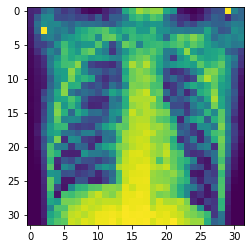

In [35]:
from matplotlib import pyplot as plt 
plt.imshow(trainTraditional[2][ : , : , 0])  
plt.show()

In [36]:
# np.array(trainTraditionalLabel).shape, np.array(trainTraditional).shape

Create UnBiased Data

In [37]:
# listofList = {}
# for x in label_list:
#   listofList[x] = []

# num = 0 
# toNum = int(min_working_no/Classes)
# print(toNum)
# for l in label_list:
#   num = 0
#   for x,y in zip(newDataTrain[:],newLabelTrain[:]):
#     if(y == l and num < toNum):
#         listofList[y].append(x)
#         num+=1

In [38]:

# total = 0
# string = "" 
# for x in listofList : 
#   total+=len(listofList[x])
#   string = string+str(len(listofList[x])) + "|"
#   print("Label >> ",x)
#   print("Data points >>",len(listofList[x]))

# print("Total >> ",total)

In [39]:
# trainTraditional = []
# trainTraditionalLabel = []
# for x in listofList:
#   for y in listofList[x]:
#     trainTraditional.append(y)
#     trainTraditionalLabel.append(x)

In [40]:
# imbal = []
# for x in label_list:
#     imbal.append(trainTraditionalLabel.count(x))

In [41]:

# oversampler=SMOTE(kind='regular',k_neighbors=2)

C:\Users\Research6\.conda\envs\pytorch\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:ylabel='count'>

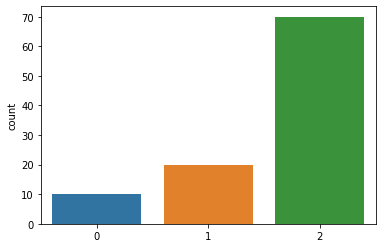

In [42]:
import seaborn as sns 
sns.countplot(np.array(trainTraditionalLabel))

In [43]:
shape = np.array(trainTraditional).shape

np.savetxt("shape.txt",shape)
np.array(trainTraditional).reshape(shape[0]* shape[1]*shape[2]*shape[3])
shappe = []
for x in shape:
    shappe.append(int(x))
    
shape = np.array(shappe)
shape

array([100,  32,  32,   3])

In [44]:
pwd

'C:\\Users\\Research6\\Desktop\\conf\\covid smote\\train'

In [45]:
path ='C:\\Users\\Research6\\Desktop\\conf\\covid smote\\train'

In [46]:
np.savetxt(path+"/images.txt",np.array(trainTraditional).reshape(shape[0] * shape[1] * shape[2] *shape[3]))
np.savetxt(path+"/labels.txt",np.array(trainTraditionalLabel))

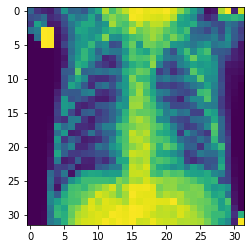

In [47]:
arr = np.loadtxt(path+'/images.txt')
from matplotlib import pyplot as plt 
plt.imshow(arr.reshape(shape)[12][ : , : , 0])  
plt.show()

# Our Code of stitching

In [48]:
def create_classical_model():
    # A simple model based off LeNet from https://keras.io/examples/mnist_cnn/
    model = tf.keras.Sequential()
    model.add(tf.keras.layers.Conv2D(32, [3, 3], activation='relu', input_shape=(32,32,3)))
    model.add(tf.keras.layers.Conv2D(64, [3, 3], activation='relu'))
    model.add(tf.keras.layers.MaxPooling2D(pool_size=(2, 2)))
    model.add(tf.keras.layers.Dropout(0.25))
    model.add(tf.keras.layers.Flatten()
    )
    model.add(tf.keras.layers.Dense(128, activation='relu'))
    model.add(tf.keras.layers.Dropout(0.5))
    model.add(tf.keras.layers.Dense(3))
    return model


model = create_classical_model()



optimizer = tf.keras.optimizers.Adam()
# optimizer.learning_rate.assign(0.00001)





model.compile(loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              optimizer=optimizer,
              metrics=['accuracy'])



# upto = int(min_working_no *.7)
# print(upto)
history2 = model.fit(np.array(trainTraditional[:]),
        np.array(trainTraditionalLabel[:]),
        epochs=100,
        )

Epoch 1/100
4/4 [==============================] - 2s 24ms/step - loss: 87.4609 - accuracy: 0.5200
Epoch 2/100
4/4 [==============================] - 0s 5ms/step - loss: 83.1141 - accuracy: 0.7000
Epoch 3/100
4/4 [==============================] - 0s 5ms/step - loss: 22.2777 - accuracy: 0.6100
Epoch 4/100
4/4 [==============================] - 0s 5ms/step - loss: 10.1241 - accuracy: 0.5800
Epoch 5/100
4/4 [==============================] - 0s 5ms/step - loss: 2.2856 - accuracy: 0.8200
Epoch 6/100
4/4 [==============================] - 0s 5ms/step - loss: 0.8848 - accuracy: 0.8500
Epoch 7/100
4/4 [==============================] - 0s 5ms/step - loss: 0.5975 - accuracy: 0.8800
Epoch 8/100
4/4 [==============================] - 0s 5ms/step - loss: 0.2980 - accuracy: 0.9100
Epoch 9/100
4/4 [==============================] - 0s 5ms/step - loss: 0.3059 - accuracy: 0.9100
Epoch 10/100
4/4 [==============================] - 0s 5ms/step - loss: 0.4232 - accuracy: 0.9100
Epoch 11/100
4/4 [======

4/4 [==============================] - 0s 5ms/step - loss: 8.2162e-04 - accuracy: 1.0000
Epoch 84/100
4/4 [==============================] - 0s 5ms/step - loss: 1.3822e-05 - accuracy: 1.0000
Epoch 85/100
4/4 [==============================] - 0s 5ms/step - loss: 1.8405e-06 - accuracy: 1.0000
Epoch 86/100
4/4 [==============================] - 0s 5ms/step - loss: 4.9590e-04 - accuracy: 1.0000
Epoch 87/100
4/4 [==============================] - 0s 4ms/step - loss: 2.0972e-04 - accuracy: 1.0000
Epoch 88/100
4/4 [==============================] - 0s 5ms/step - loss: 1.9577e-04 - accuracy: 1.0000
Epoch 89/100
4/4 [==============================] - 0s 5ms/step - loss: 8.1921e-06 - accuracy: 1.0000
Epoch 90/100
4/4 [==============================] - 0s 5ms/step - loss: 1.0032e-04 - accuracy: 1.0000
Epoch 91/100
4/4 [==============================] - 0s 5ms/step - loss: 1.4423e-06 - accuracy: 1.0000
Epoch 92/100
4/4 [==============================] - 0s 5ms/step - loss: 1.4233e-05 - accuracy: 

In [49]:
"accuracy >> {}".format(model.evaluate(np.array(x_test), np.array(y_test), verbose=0)[1])  

'accuracy >> 0.7121211886405945'

In [50]:
# preds = model.predict(np.array(x_test))
y_prob = model.predict(np.array(x_test)) 
y_classes = y_prob.argmax(axis=-1)

In [51]:
import seaborn as sn

In [52]:
from sklearn.metrics import classification_report


# report = classification_report(np.array(y_test), np.array(predictions).argmax(axis=-1))
# print(report)
report = classification_report(y_test, y_classes)
print(report)

              precision    recall  f1-score   support

           0       1.00      0.65      0.79        26
           1       0.52      0.60      0.56        20
           2       0.69      0.90      0.78        20

    accuracy                           0.71        66
   macro avg       0.74      0.72      0.71        66
weighted avg       0.76      0.71      0.72        66



[[17  9  0]
 [ 0 12  8]
 [ 0  2 18]]


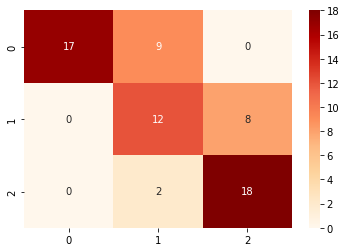

In [53]:
import sklearn.metrics

y_true = y_test
y_pred = y_classes

r = sklearn.metrics.confusion_matrix(y_true, y_pred)
sn.heatmap(r, annot=True,cmap="OrRd")
plt.savefig("Original1"+ ".jpg", dpi = 600)
print(r)

In [54]:
from sklearn.metrics import balanced_accuracy_score
y_true = y_test
y_pred = y_classes
balanced_accuracy_score(y_true, y_pred)

0.717948717948718

In [55]:
from imblearn.metrics import geometric_mean_score
y_true = y_test
y_pred = y_classes
# geometric_mean_score(y_true, y_pred)
geometric_mean_score(y_true, y_pred, average='macro')

0.7868295279520385

In [56]:

# def resnet_layer(inputs, num_filters=16, kernel_size=3, strides=1, activation='relu', batch_normalization=True, conv_first=True):
  
#   conv = Conv2D(num_filters, kernel_size=kernel_size, strides=strides, padding='same')

#   x = inputs
#   if conv_first:
#       x = conv(x)
#       if batch_normalization:
#           x = BatchNormalization()(x)
#       if activation is not None:
#           x = Activation(activation)(x)
#   else:
#       if batch_normalization:
#           x = BatchNormalization()(x)
#       if activation is not None:
#           x = Activation(activation)(x)
#       x = conv(x)
#   return x
# def resnet_v1(input_shape, depth = 20, num_classes=Classes):
    
#     if (depth - 2) % 6 != 0:
#         raise ValueError('depth should be 6n+2 (eg 20, 32, 44 in [a])')
#     # Start model definition.
#     num_filters = 16
#     num_res_blocks = int((depth - 2) / 6)

#     inputs = Input(shape=input_shape)
#     x = resnet_layer(inputs=inputs)
#     # Instantiate the stack of residual units
#     for stack in range(3):
#         for res_block in range(num_res_blocks):
#             strides = 1
#             if stack > 0 and res_block == 0:  # first layer but not first stack
#                 strides = 2  # downsample
#             y = resnet_layer(inputs=x,num_filters=num_filters,strides=strides)
#             y = resnet_layer(inputs=y,num_filters=num_filters,activation=None)
#             if stack > 0 and res_block == 0:  # first layer but not first stack
#                 # linear projection residual shortcut connection to match
#                 # changed dims
#                 x = resnet_layer(inputs=x,num_filters=num_filters,kernel_size=1,strides=strides,activation=None,batch_normalization=False)
#             x = keras.layers.add([x, y])
#             x = Activation('relu')(x)
#             x = Dropout(rate=0.25)(x)
#         num_filters *= 2

#     # Add classifier on top.
#     # v1 does not use BN after last shortcut connection-ReLU
#     x = AveragePooling2D(pool_size=8)(x)
#     y = Flatten()(x)
#     outputs = Dense(num_classes, activation='softmax')(y)

#     # Instantiate model.
#     model = Model(inputs=inputs, outputs=outputs)
#     return model


  
# def transferLearning(shape):
#   from tensorflow.keras.applications.inception_v3 import InceptionV3

#   import os

#   from tensorflow.keras import layers
#   from tensorflow.keras import Model

#   !wget --no-check-certificate \
#       https://storage.googleapis.com/mledu-datasets/inception_v3_weights_tf_dim_ordering_tf_kernels_notop.h5 \
#       -O /tmp/inception_v3_weights_tf_dim_ordering_tf_kernels_notop.h5

#   local_weights_file = '/tmp/inception_v3_weights_tf_dim_ordering_tf_kernels_notop.h5'

#   pre_trained_model = InceptionV3(input_shape = shape, 
#                                   include_top = False, 
#                                   weights = None)

#   pre_trained_model.load_weights(local_weights_file)

#   for layer in pre_trained_model.layers:
#     layer.trainable = False
    
#   # pre_trained_model.summary()

#   last_layer = pre_trained_model.get_layer('mixed7')
#   print('last layer output shape: ', last_layer.output_shape)
#   last_output = last_layer.output

#   from tensorflow.keras.optimizers import RMSprop

# # Flatten the output layer to 1 dimension
#   x = layers.Flatten()(last_output)
#   # Add a fully connected layer with 1,024 hidden units and ReLU activation
#   x = layers.Dense(1024, activation='relu')(x)
#   # Add a dropout rate of 0.2
#   x = layers.Dropout(0.2)(x)                  
#   # Add a final sigmoid layer for classification
#   x = layers.Dense  (Classes)(x)           

#   model = Model( pre_trained_model.input, x) 

#   optimizer = tf.keras.optimizers.Adam(0.0001)
#   # optimizer.learning_rate.assign(0.01)

#   model.compile(optimizer = optimizer, 
#                 loss = tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True), 
#                 metrics = ['accuracy'])
  
#   return model


# def create_classical_model(shape):
#     # A simple model based off LeNet from https://keras.io/examples/mnist_cnn/
#     model = tf.keras.Sequential()
#     model.add(tf.keras.layers.Conv2D(32, [3, 3], activation='relu', input_shape=shape))
#     model.add(tf.keras.layers.Conv2D(64, [3, 3], activation='relu'))
#     model.add(tf.keras.layers.MaxPooling2D(pool_size=(2, 2)))
#     model.add(tf.keras.layers.Dropout(0.25))
#     model.add(tf.keras.layers.Flatten())
#     model.add(tf.keras.layers.Dense(128, activation='relu'))
#     model.add(tf.keras.layers.Dropout(0.5))
#     model.add(tf.keras.layers.Dense(Classes,activation="softmax"))
#     return model

In [57]:
# from tensorflow.keras import metrics

In [58]:
# model = create_classical_model(combined_train[0].shape)
# # optimizer = tf.keras.optimizers.Adam(0.01)
# # optimizer.learning_rate.assign(0.00001)

# optimizer = tf.keras.optimizers.Adam(LR)

# model.compile(loss=tf.keras.losses.SparseCategoricalCrossentropy(),
#               optimizer=optimizer,
#               metrics=['accuracy'])


# filepath="weights-improvemess1.hdf5"
# checkpoint = tf.keras.callbacks.ModelCheckpoint(filepath, monitor='accuracy', 
#                                                 verbose=1, save_best_only=True, 
#                                                 mode='max')
# callbacks_list = [checkpoint]
# print(len(combined_train))
# history = model.fit(
#           np.array(combined_train),np.array(combined_label),
#           epochs=epoch,
#           callbacks=callbacks_list
#           )

# # print(len(newDatatest)) 
# model.load_weights(filepath)
# model.compile(loss=tf.keras.losses.SparseCategoricalCrossentropy(),
#           optimizer=optimizer,
#           metrics=['accuracy'])
# # our_lenet = model.evaluate(np.array(combined_test), np.array(combined_label_test)
# #     )[1] 

# plt.plot(history.history["accuracy"], label='accuracy')    
# # plt.plot(history.history["val_accuracy"], label = 'val_accuracy')   
# plt.xlabel('Epoch')   
# plt.ylabel('Accuracy')      
# plt.legend(loc='lower right')    
# plt.show()  

In [59]:
# def find_percentage_agreement(s1, s2):
#     assert len(s1)==len(s2), "Lists must have the same shape"
#     nb_agreements = 0  # initialize counter to 0
#     for idx, value in enumerate(s1):
#         if s2[idx] == value:
#             nb_agreements += 1

#     percentage_agreement = nb_agreements/len(s1)

#     return percentage_agreement 

In [60]:
# combined_label_test[:20]

In [61]:
# from collections import Counter
# predictions = []
# for batch,label in zip(combined_test[:],combined_label_test[:]):
#   preds = model.predict(np.array(batch))
#   votes = []
#   for x,l,y in zip(batch,label,preds):
#     votes.append(np.where(y == max(y))[0].tolist()[0])
#     votes2 = Counter(votes)
#   maxVotes = votes2.most_common(1)[0][0]
#   # print(maxVotes) 
#   predictions.append(maxVotes)
  
# actualLabels = []
# for x in combined_label_test[:]:
#   actualLabels.append(x[0])
   
# our_lenet = find_percentage_agreement(predictions, actualLabels
#                                      )
# print(our_lenet)

In [62]:
# np.savetxt(experiment_Name+"_predicted_CBL.txt",predictions)
# np.savetxt(experiment_Name+"_actual_CBL.txt",actualLabels)

In [63]:
# from sklearn.metrics import classification_report

# # history = model.fit(x_train, y_train, batch_size=32, epochs=10, verbose=1, validation_data=(x_test, y_test), shuffle=True)
# # pred = model.predict(x_test, batch_size=32, verbose=1)
# # predicted = np.argmax(pred, axis=1)
# # actualLabels = np.array([1,2,3,4,3,2,1,1])
# # predictions = np.array([1,2,4,4,4,2,2,1])
# report = classification_report(np.array(actualLabels), np.array(predictions))
# print(report)

In [64]:
# model.evaluate(np.array(combined_test[0][0]),np.array(combined_label_test[:28]))

In [65]:
# import sklearn.metrics

# y_true = actualLabels
# y_pred = predictions

# r = sklearn.metrics.confusion_matrix(y_true, y_pred)
# print(r)

In [66]:
# from sklearn.metrics import balanced_accuracy_score
# y_true = actualLabels
# y_pred = predictions
# balanced_accuracy_score(y_true, y_pred)

In [67]:
# from imblearn.metrics import geometric_mean_score
# y_true = actualLabels
# y_pred = predictions
# # geometric_mean_score(y_true, y_pred)
# geometric_mean_score(y_true, y_pred, average='macro')

# SMOTE

C:\Users\Research6\.conda\envs\pytorch\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:ylabel='count'>

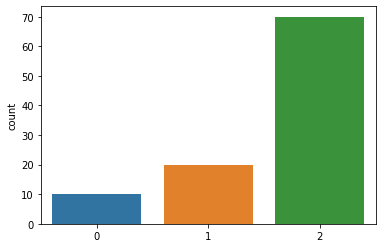

In [68]:
import seaborn as sns 
sns.countplot(np.array(trainTraditionalLabel))

In [69]:
trainTraditional.shape

(100, 32, 32, 3)

In [70]:
ReX_train = trainTraditional.reshape(100, 32 *32 * 3)

In [71]:
ReX_train.shape

(100, 3072)

In [72]:
from imblearn.over_sampling import SMOTE
sm = SMOTE(random_state=42)
X_smote, y_smote = sm.fit_resample(ReX_train, trainTraditionalLabel)

C:\Users\Research6\.conda\envs\pytorch\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:ylabel='count'>

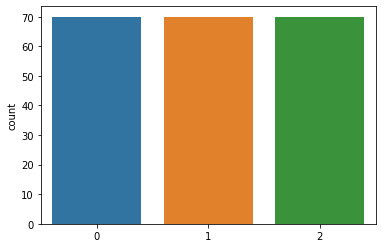

In [73]:
import seaborn as sns 
sns.countplot(np.array(y_smote))

In [74]:
ImagesData = []
Labels = []

for x,y in zip(X_smote,y_smote):
    ImagesData.append(x.reshape(32,32,3))
    Labels.append(y)

In [75]:
Labels[0]

1

In [76]:
ImagesData[0].shape,np.array(Labels[:]).shape

((32, 32, 3), (210,))

In [77]:
Classes = 3
# LR = 0.000009
import tensorflow as tf
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt 
from random import randint
batch_size = 64

In [78]:
def create_classical_model():
    # A simple model based off LeNet from https://keras.io/examples/mnist_cnn/
    model = tf.keras.Sequential()
    model.add(tf.keras.layers.Conv2D(32, [3, 3], activation='relu', input_shape=(32,32,3)))
    model.add(tf.keras.layers.Conv2D(64, [3, 3], activation='relu'))
    model.add(tf.keras.layers.MaxPooling2D(pool_size=(2, 2)))
    model.add(tf.keras.layers.Dropout(0.25))
    model.add(tf.keras.layers.Flatten()
    )
    model.add(tf.keras.layers.Dense(128, activation='relu'))
    model.add(tf.keras.layers.Dropout(0.5))
    model.add(tf.keras.layers.Dense(3))
    return model


model = create_classical_model()



optimizer = tf.keras.optimizers.Adam()
# optimizer.learning_rate.assign(0.00001)





model.compile(loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              optimizer=optimizer,
              metrics=['accuracy'])



# upto = int(min_working_no *.7)
# print(upto)
history2 = model.fit(np.array(ImagesData[:]),
        np.array(Labels[:]),
        epochs=100,
        )


Epoch 1/100
7/7 [==============================] - 0s 18ms/step - loss: 189.5589 - accuracy: 0.3810
Epoch 2/100
7/7 [==============================] - 0s 6ms/step - loss: 18.0542 - accuracy: 0.5095
Epoch 3/100
7/7 [==============================] - 0s 6ms/step - loss: 1.9843 - accuracy: 0.6857
Epoch 4/100
7/7 [==============================] - 0s 6ms/step - loss: 0.5991 - accuracy: 0.7857
Epoch 5/100
7/7 [==============================] - 0s 6ms/step - loss: 0.3913 - accuracy: 0.8905
Epoch 6/100
7/7 [==============================] - 0s 6ms/step - loss: 0.3273 - accuracy: 0.8476
Epoch 7/100
7/7 [==============================] - 0s 5ms/step - loss: 0.2524 - accuracy: 0.9048
Epoch 8/100
7/7 [==============================] - 0s 5ms/step - loss: 0.1426 - accuracy: 0.9524
Epoch 9/100
7/7 [==============================] - 0s 6ms/step - loss: 0.1315 - accuracy: 0.9524
Epoch 10/100
7/7 [==============================] - 0s 6ms/step - loss: 0.0651 - accuracy: 0.9857
Epoch 11/100
7/7 [=======

7/7 [==============================] - 0s 6ms/step - loss: 0.0108 - accuracy: 0.9952
Epoch 85/100
7/7 [==============================] - 0s 6ms/step - loss: 0.0012 - accuracy: 1.0000
Epoch 86/100
7/7 [==============================] - 0s 6ms/step - loss: 0.0028 - accuracy: 1.0000
Epoch 87/100
7/7 [==============================] - 0s 5ms/step - loss: 4.1879e-04 - accuracy: 1.0000
Epoch 88/100
7/7 [==============================] - 0s 5ms/step - loss: 0.0019 - accuracy: 1.0000
Epoch 89/100
7/7 [==============================] - 0s 5ms/step - loss: 0.0030 - accuracy: 1.0000
Epoch 90/100
7/7 [==============================] - 0s 5ms/step - loss: 0.0058 - accuracy: 0.9952
Epoch 91/100
7/7 [==============================] - 0s 5ms/step - loss: 0.0018 - accuracy: 1.0000
Epoch 92/100
7/7 [==============================] - 0s 5ms/step - loss: 0.0029 - accuracy: 1.0000
Epoch 93/100
7/7 [==============================] - 0s 5ms/step - loss: 7.2790e-05 - accuracy: 1.0000
Epoch 94/100
7/7 [=======

In [79]:
"accuracy >> {}".format(model.evaluate(np.array(x_test), np.array(y_test), verbose=0)[1])  

'accuracy >> 0.7575757503509521'

In [80]:

# preds = model.predict(np.array(x_test))
y_prob = model.predict(np.array(x_test)) 
y_classes = y_prob.argmax(axis=-1)

In [81]:
from sklearn.metrics import classification_report


# report = classification_report(np.array(y_test), np.array(predictions).argmax(axis=-1))
# print(report)
report = classification_report(y_test, y_classes)
print(report)

              precision    recall  f1-score   support

           0       1.00      0.88      0.94        26
           1       0.78      0.35      0.48        20
           2       0.59      1.00      0.74        20

    accuracy                           0.76        66
   macro avg       0.79      0.74      0.72        66
weighted avg       0.81      0.76      0.74        66



[[23  2  1]
 [ 0  7 13]
 [ 0  0 20]]


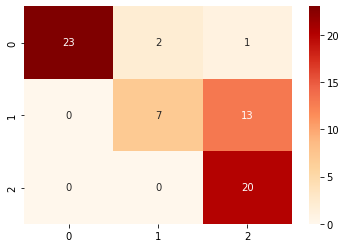

In [82]:
import sklearn.metrics

y_true = y_test
y_pred = y_classes

r = sklearn.metrics.confusion_matrix(y_true, y_pred)
sn.heatmap(r, annot=True,cmap="OrRd")
plt.savefig("smote1"+ ".jpg", dpi = 600)
print(r)

In [83]:
from sklearn.metrics import balanced_accuracy_score
y_true = y_test
y_pred = y_classes
balanced_accuracy_score(y_true, y_pred)

0.7448717948717949

In [84]:
from imblearn.metrics import geometric_mean_score
y_true = y_test
y_pred = y_classes
# geometric_mean_score(y_true, y_pred)
geometric_mean_score(y_true, y_pred, average='macro')




0.8114861968267127

# SVM SMOTE

C:\Users\Research6\.conda\envs\pytorch\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:ylabel='count'>

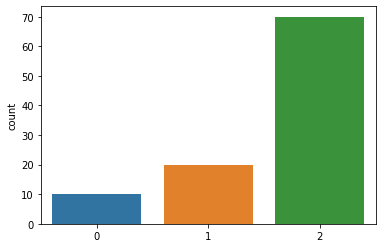

In [85]:
import seaborn as sns 
sns.countplot(np.array(trainTraditionalLabel))

In [86]:
trainTraditional.shape

(100, 32, 32, 3)

In [87]:
ReX_train = trainTraditional.reshape(100, 32 *32 * 3)

In [88]:
ReX_train.shape

(100, 3072)

In [89]:
from imblearn.over_sampling import SVMSMOTE 
sm = SVMSMOTE(random_state=42)
X_smote, y_smote = sm.fit_resample(ReX_train, trainTraditionalLabel)

C:\Users\Research6\.conda\envs\pytorch\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:ylabel='count'>

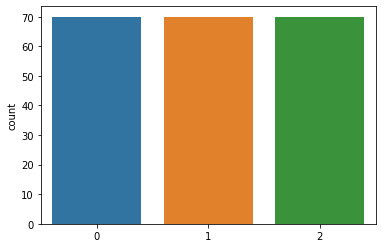

In [90]:
import seaborn as sns 
sns.countplot(np.array(y_smote))

In [91]:
ImagesData = []
Labels = []

for x,y in zip(X_smote,y_smote):
    ImagesData.append(x.reshape(32,32,3))
    Labels.append(y)

In [92]:
ImagesData[0].shape,np.array(Labels[:]).shape

((32, 32, 3), (210,))

In [93]:
Classes = 3
# LR = 0.000009
import tensorflow as tf
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt 
from random import randint
batch_size = 64

In [94]:
def create_classical_model():
    # A simple model based off LeNet from https://keras.io/examples/mnist_cnn/
    model = tf.keras.Sequential()
    model.add(tf.keras.layers.Conv2D(32, [3, 3], activation='relu', input_shape=(32,32,3)))
    model.add(tf.keras.layers.Conv2D(64, [3, 3], activation='relu'))
    model.add(tf.keras.layers.MaxPooling2D(pool_size=(2, 2)))
    model.add(tf.keras.layers.Dropout(0.25))
    model.add(tf.keras.layers.Flatten()
    )
    model.add(tf.keras.layers.Dense(128, activation='relu'))
    model.add(tf.keras.layers.Dropout(0.5))
    model.add(tf.keras.layers.Dense(3))
    return model


model = create_classical_model()



optimizer = tf.keras.optimizers.Adam()
# optimizer.learning_rate.assign(0.00001)





model.compile(loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              optimizer=optimizer,
              metrics=['accuracy'])



# upto = int(min_working_no *.7)
# print(upto)
history2 = model.fit(np.array(ImagesData[:]),
        np.array(Labels[:]),
        epochs=100,
        )


Epoch 1/100
7/7 [==============================] - 0s 7ms/step - loss: 154.4171 - accuracy: 0.3143
Epoch 2/100
7/7 [==============================] - 0s 7ms/step - loss: 9.7311 - accuracy: 0.4810
Epoch 3/100
7/7 [==============================] - 0s 7ms/step - loss: 0.9361 - accuracy: 0.7667
Epoch 4/100
7/7 [==============================] - 0s 7ms/step - loss: 0.2979 - accuracy: 0.8952
Epoch 5/100
7/7 [==============================] - 0s 7ms/step - loss: 0.1972 - accuracy: 0.9286
Epoch 6/100
7/7 [==============================] - 0s 7ms/step - loss: 0.1876 - accuracy: 0.9429
Epoch 7/100
7/7 [==============================] - 0s 7ms/step - loss: 0.0970 - accuracy: 0.9714
Epoch 8/100
7/7 [==============================] - 0s 7ms/step - loss: 0.0830 - accuracy: 0.9619
Epoch 9/100
7/7 [==============================] - 0s 6ms/step - loss: 0.0786 - accuracy: 0.9762
Epoch 10/100
7/7 [==============================] - 0s 6ms/step - loss: 0.0655 - accuracy: 0.9857
Epoch 11/100
7/7 [=========

7/7 [==============================] - 0s 5ms/step - loss: 0.0014 - accuracy: 1.0000
Epoch 85/100
7/7 [==============================] - 0s 5ms/step - loss: 0.0088 - accuracy: 0.9952
Epoch 86/100
7/7 [==============================] - 0s 5ms/step - loss: 0.0135 - accuracy: 0.9952
Epoch 87/100
7/7 [==============================] - 0s 5ms/step - loss: 0.0303 - accuracy: 0.9905
Epoch 88/100
7/7 [==============================] - 0s 6ms/step - loss: 0.0299 - accuracy: 0.9905
Epoch 89/100
7/7 [==============================] - 0s 5ms/step - loss: 0.0033 - accuracy: 1.0000
Epoch 90/100
7/7 [==============================] - 0s 5ms/step - loss: 0.0344 - accuracy: 0.9857
Epoch 91/100
7/7 [==============================] - 0s 6ms/step - loss: 0.0371 - accuracy: 0.9952
Epoch 92/100
7/7 [==============================] - 0s 5ms/step - loss: 0.0084 - accuracy: 1.0000
Epoch 93/100
7/7 [==============================] - 0s 6ms/step - loss: 0.0013 - accuracy: 1.0000
Epoch 94/100
7/7 [===============

In [95]:
"accuracy >> {}".format(model.evaluate(np.array(x_test), np.array(y_test), verbose=0)[1])  

'accuracy >> 0.6515151262283325'

In [96]:
# preds = model.predict(np.array(x_test))
y_prob = model.predict(np.array(x_test)) 
y_classes = y_prob.argmax(axis=-1)

In [97]:
from sklearn.metrics import classification_report


# report = classification_report(np.array(y_test), np.array(predictions).argmax(axis=-1))
# print(report)
report = classification_report(y_test, y_classes)
print(report)

              precision    recall  f1-score   support

           0       1.00      0.62      0.76        26
           1       0.48      0.50      0.49        20
           2       0.59      0.85      0.69        20

    accuracy                           0.65        66
   macro avg       0.69      0.66      0.65        66
weighted avg       0.72      0.65      0.66        66



[[16  8  2]
 [ 0 10 10]
 [ 0  3 17]]


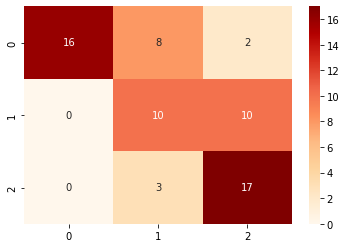

In [98]:
import sklearn.metrics

y_true = y_test
y_pred = y_classes

r = sklearn.metrics.confusion_matrix(y_true, y_pred)
sn.heatmap(r, annot=True,cmap="OrRd")
plt.savefig("svm smote1"+ ".jpg", dpi = 600)
print(r)

In [99]:
from sklearn.metrics import balanced_accuracy_score
y_true = y_test
y_pred = y_classes
balanced_accuracy_score(y_true, y_pred)

0.6551282051282051

In [100]:
from imblearn.metrics import geometric_mean_score
y_true = y_test
y_pred = y_classes
# geometric_mean_score(y_true, y_pred)
geometric_mean_score(y_true, y_pred, average='macro')


0.7388776427394261

# Adasyn

C:\Users\Research6\.conda\envs\pytorch\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:ylabel='count'>

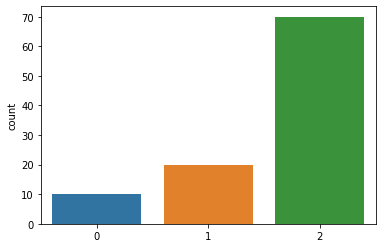

In [101]:
import seaborn as sns 
sns.countplot(np.array(trainTraditionalLabel))

In [102]:
trainTraditional.shape

(100, 32, 32, 3)

In [103]:
ReX_train = trainTraditional.reshape(100, 32 *32 * 3)

In [104]:
ReX_train.shape

(100, 3072)

In [105]:
from imblearn.over_sampling import ADASYN 
sm = ADASYN(random_state=42)
X_smote, y_smote = sm.fit_resample(ReX_train, trainTraditionalLabel)

C:\Users\Research6\.conda\envs\pytorch\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:ylabel='count'>

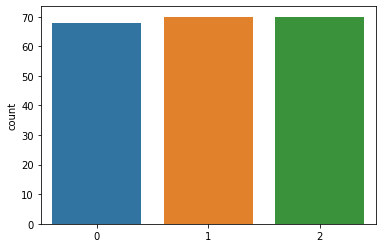

In [106]:
import seaborn as sns 
sns.countplot(np.array(y_smote))

In [107]:
ImagesData = []
Labels = []

for x,y in zip(X_smote,y_smote):
    ImagesData.append(x.reshape(32,32,3))
    Labels.append(y)

In [108]:
ImagesData[0].shape,np.array(Labels[:]).shape

((32, 32, 3), (208,))

In [109]:
Classes = 3
# LR = 0.000009
import tensorflow as tf
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt 
from random import randint
batch_size = 64

In [110]:
def create_classical_model():
    # A simple model based off LeNet from https://keras.io/examples/mnist_cnn/
    model = tf.keras.Sequential()
    model.add(tf.keras.layers.Conv2D(32, [3, 3], activation='relu', input_shape=(32,32,3)))
    model.add(tf.keras.layers.Conv2D(64, [3, 3], activation='relu'))
    model.add(tf.keras.layers.MaxPooling2D(pool_size=(2, 2)))
    model.add(tf.keras.layers.Dropout(0.25))
    model.add(tf.keras.layers.Flatten()
    )
    model.add(tf.keras.layers.Dense(128, activation='relu'))
    model.add(tf.keras.layers.Dropout(0.5))
    model.add(tf.keras.layers.Dense(3))
    return model


model = create_classical_model()



optimizer = tf.keras.optimizers.Adam()
# optimizer.learning_rate.assign(0.00001)





model.compile(loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              optimizer=optimizer,
              metrics=['accuracy'])



# upto = int(min_working_no *.7)
# print(upto)
history2 = model.fit(np.array(ImagesData[:]),
        np.array(Labels[:]),
        epochs=100,
        )


Epoch 1/100
7/7 [==============================] - 0s 21ms/step - loss: 151.6988 - accuracy: 0.3558
Epoch 2/100
7/7 [==============================] - 0s 7ms/step - loss: 10.0497 - accuracy: 0.4135
Epoch 3/100
7/7 [==============================] - 0s 7ms/step - loss: 1.2524 - accuracy: 0.7067
Epoch 4/100
7/7 [==============================] - 0s 7ms/step - loss: 0.5958 - accuracy: 0.7788
Epoch 5/100
7/7 [==============================] - 0s 7ms/step - loss: 0.3376 - accuracy: 0.9087
Epoch 6/100
7/7 [==============================] - 0s 7ms/step - loss: 0.2580 - accuracy: 0.9038
Epoch 7/100
7/7 [==============================] - 0s 6ms/step - loss: 0.1686 - accuracy: 0.9663
Epoch 8/100
7/7 [==============================] - 0s 6ms/step - loss: 0.1192 - accuracy: 0.9663
Epoch 9/100
7/7 [==============================] - 0s 6ms/step - loss: 0.1325 - accuracy: 0.9423
Epoch 10/100
7/7 [==============================] - 0s 6ms/step - loss: 0.0630 - accuracy: 0.9808
Epoch 11/100
7/7 [=======

7/7 [==============================] - 0s 5ms/step - loss: 0.0148 - accuracy: 0.9904
Epoch 85/100
7/7 [==============================] - 0s 5ms/step - loss: 0.0012 - accuracy: 1.0000
Epoch 86/100
7/7 [==============================] - 0s 6ms/step - loss: 0.0014 - accuracy: 1.0000
Epoch 87/100
7/7 [==============================] - 0s 6ms/step - loss: 0.0146 - accuracy: 0.9952
Epoch 88/100
7/7 [==============================] - 0s 6ms/step - loss: 0.0015 - accuracy: 1.0000
Epoch 89/100
7/7 [==============================] - 0s 5ms/step - loss: 0.0064 - accuracy: 0.9952
Epoch 90/100
7/7 [==============================] - 0s 5ms/step - loss: 0.0027 - accuracy: 1.0000
Epoch 91/100
7/7 [==============================] - 0s 7ms/step - loss: 0.0030 - accuracy: 1.0000
Epoch 92/100
7/7 [==============================] - 0s 6ms/step - loss: 8.9015e-04 - accuracy: 1.0000
Epoch 93/100
7/7 [==============================] - 0s 5ms/step - loss: 7.4073e-04 - accuracy: 1.0000
Epoch 94/100
7/7 [=======

In [111]:
"accuracy >> {}".format(model.evaluate(np.array(x_test), np.array(y_test), verbose=0)[1])  

'accuracy >> 0.6212121248245239'

In [112]:
# preds = model.predict(np.array(x_test))
y_prob = model.predict(np.array(x_test)) 
y_classes = y_prob.argmax(axis=-1)

In [113]:
from sklearn.metrics import classification_report


# report = classification_report(np.array(y_test), np.array(predictions).argmax(axis=-1))
# print(report)
report = classification_report(y_test, y_classes)
print(report)

              precision    recall  f1-score   support

           0       1.00      0.62      0.76        26
           1       0.50      0.25      0.33        20
           2       0.50      1.00      0.67        20

    accuracy                           0.62        66
   macro avg       0.67      0.62      0.59        66
weighted avg       0.70      0.62      0.60        66



[[16  5  5]
 [ 0  5 15]
 [ 0  0 20]]


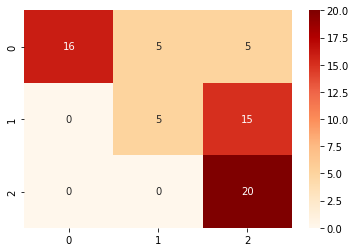

In [114]:
import sklearn.metrics

y_true = y_test
y_pred = y_classes

r = sklearn.metrics.confusion_matrix(y_true, y_pred)
sn.heatmap(r, annot=True,cmap="OrRd")
plt.savefig("adasyn1"+ ".jpg", dpi = 600)
print(r)

In [115]:
from sklearn.metrics import balanced_accuracy_score
y_true = y_test
y_pred = y_classes
balanced_accuracy_score(y_true, y_pred)

0.6217948717948718

In [116]:
from imblearn.metrics import geometric_mean_score
y_true = y_test
y_pred = y_classes
# geometric_mean_score(y_true, y_pred)
geometric_mean_score(y_true, y_pred, average='macro')

0.7135480875745572

# Borderline SMOTE

C:\Users\Research6\.conda\envs\pytorch\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:ylabel='count'>

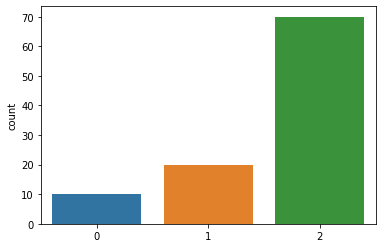

In [117]:
import seaborn as sns 
sns.countplot(np.array(trainTraditionalLabel))

In [118]:
trainTraditional.shape

(100, 32, 32, 3)

In [119]:
ReX_train = trainTraditional.reshape(100, 32 *32 * 3)

In [120]:
ReX_train.shape

(100, 3072)

In [121]:
from imblearn.over_sampling import BorderlineSMOTE
sm = BorderlineSMOTE(random_state=42)
X_smote, y_smote = sm.fit_resample(ReX_train, trainTraditionalLabel)

C:\Users\Research6\.conda\envs\pytorch\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:ylabel='count'>

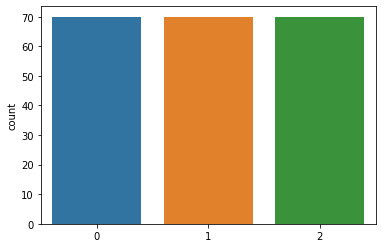

In [122]:
import seaborn as sns 
sns.countplot(np.array(y_smote))

In [123]:
ImagesData = []
Labels = []

for x,y in zip(X_smote,y_smote):
    ImagesData.append(x.reshape(32,32,3))
    Labels.append(y)

In [124]:
ImagesData[0].shape,np.array(Labels[:]).shape

((32, 32, 3), (210,))

In [125]:
Classes = 10
LR = 0.000009
import tensorflow as tf
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt 
from random import randint
batch_size = 64

In [126]:
def create_classical_model():
    # A simple model based off LeNet from https://keras.io/examples/mnist_cnn/
    model = tf.keras.Sequential()
    model.add(tf.keras.layers.Conv2D(32, [3, 3], activation='relu', input_shape=(32,32,3)))
    model.add(tf.keras.layers.Conv2D(64, [3, 3], activation='relu'))
    model.add(tf.keras.layers.MaxPooling2D(pool_size=(2, 2)))
    model.add(tf.keras.layers.Dropout(0.25))
    model.add(tf.keras.layers.Flatten()
    )
    model.add(tf.keras.layers.Dense(128, activation='relu'))
    model.add(tf.keras.layers.Dropout(0.5))
    model.add(tf.keras.layers.Dense(10))
    return model


model = create_classical_model()



optimizer = tf.keras.optimizers.Adam()
# optimizer.learning_rate.assign(0.00001)





model.compile(loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              optimizer=optimizer,
              metrics=['accuracy'])



# upto = int(min_working_no *.7)
# print(upto)
history2 = model.fit(np.array(ImagesData[:]),
        np.array(Labels[:]),
        epochs=100,
        )


Epoch 1/100
7/7 [==============================] - 0s 7ms/step - loss: 62.8982 - accuracy: 0.3238
Epoch 2/100
7/7 [==============================] - 0s 6ms/step - loss: 11.0559 - accuracy: 0.6000
Epoch 3/100
7/7 [==============================] - 0s 5ms/step - loss: 1.4104 - accuracy: 0.7762
Epoch 4/100
7/7 [==============================] - 0s 3ms/step - loss: 0.5242 - accuracy: 0.8286
Epoch 5/100
7/7 [==============================] - 0s 5ms/step - loss: 0.3656 - accuracy: 0.8905
Epoch 6/100
7/7 [==============================] - 0s 6ms/step - loss: 0.2206 - accuracy: 0.9429
Epoch 7/100
7/7 [==============================] - 0s 5ms/step - loss: 0.1627 - accuracy: 0.9524
Epoch 8/100
7/7 [==============================] - 0s 6ms/step - loss: 0.1286 - accuracy: 0.9619
Epoch 9/100
7/7 [==============================] - 0s 5ms/step - loss: 0.0933 - accuracy: 0.9857
Epoch 10/100
7/7 [==============================] - 0s 5ms/step - loss: 0.0401 - accuracy: 0.9952
Epoch 11/100
7/7 [=========

7/7 [==============================] - 0s 6ms/step - loss: 1.3114e-04 - accuracy: 1.0000
Epoch 85/100
7/7 [==============================] - 0s 6ms/step - loss: 0.0094 - accuracy: 0.9952
Epoch 86/100
7/7 [==============================] - 0s 6ms/step - loss: 0.0050 - accuracy: 1.0000
Epoch 87/100
7/7 [==============================] - 0s 5ms/step - loss: 9.9506e-05 - accuracy: 1.0000
Epoch 88/100
7/7 [==============================] - 0s 5ms/step - loss: 0.0026 - accuracy: 1.0000
Epoch 89/100
7/7 [==============================] - 0s 5ms/step - loss: 4.8361e-05 - accuracy: 1.0000
Epoch 90/100
7/7 [==============================] - 0s 6ms/step - loss: 1.5555e-04 - accuracy: 1.0000
Epoch 91/100
7/7 [==============================] - 0s 5ms/step - loss: 0.0016 - accuracy: 1.0000
Epoch 92/100
7/7 [==============================] - 0s 5ms/step - loss: 0.0138 - accuracy: 0.9952
Epoch 93/100
7/7 [==============================] - 0s 6ms/step - loss: 4.2787e-05 - accuracy: 1.0000
Epoch 94/100


In [127]:
"accuracy >> {}".format(model.evaluate(np.array(x_test), np.array(y_test), verbose=0)[1])  

'accuracy >> 0.7272727489471436'

In [128]:
# preds = model.predict(np.array(x_test))
y_prob = model.predict(np.array(x_test)) 
y_classes = y_prob.argmax(axis=-1)

In [129]:
from sklearn.metrics import classification_report


# report = classification_report(np.array(y_test), np.array(predictions).argmax(axis=-1))
# print(report)
report = classification_report(y_test, y_classes)

print(report)

              precision    recall  f1-score   support

           0       1.00      0.77      0.87        26
           1       0.60      0.45      0.51        20
           2       0.61      0.95      0.75        20

    accuracy                           0.73        66
   macro avg       0.74      0.72      0.71        66
weighted avg       0.76      0.73      0.72        66



[[20  5  1]
 [ 0  9 11]
 [ 0  1 19]]


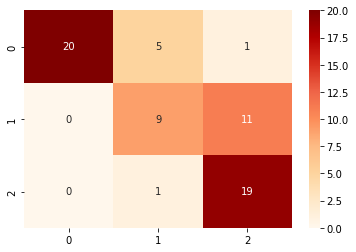

In [130]:
import sklearn.metrics

y_true = y_test
y_pred = y_classes

r = sklearn.metrics.confusion_matrix(y_true, y_pred)
sn.heatmap(r, annot=True,cmap="OrRd")
plt.savefig("borderline_smote1"+ ".jpg", dpi = 600)
print(r)

In [131]:
from sklearn.metrics import balanced_accuracy_score
y_true = y_test
y_pred = y_classes
balanced_accuracy_score(y_true, y_pred)

0.7230769230769232

In [132]:
from imblearn.metrics import geometric_mean_score
y_true = y_test
y_pred = y_classes
# geometric_mean_score(y_true, y_pred)
geometric_mean_score(y_true, y_pred, average='macro')

0.7929454847629943

# RandomOversampler

C:\Users\Research6\.conda\envs\pytorch\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:ylabel='count'>

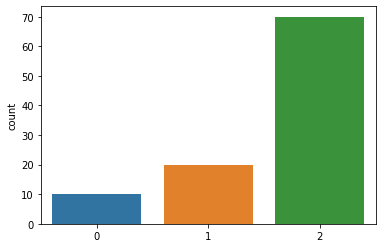

In [133]:
import seaborn as sns 
sns.countplot(np.array(trainTraditionalLabel))

In [134]:
trainTraditional.shape

(100, 32, 32, 3)

In [135]:
ReX_train = trainTraditional.reshape(100, 32 *32 * 3)

In [136]:
ReX_train.shape

(100, 3072)

In [137]:
from imblearn.over_sampling import RandomOverSampler  
ros = RandomOverSampler(random_state=42)
X_smote, y_smote = sm.fit_resample(ReX_train, trainTraditionalLabel)

C:\Users\Research6\.conda\envs\pytorch\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:ylabel='count'>

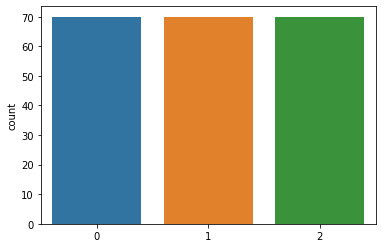

In [138]:
import seaborn as sns 
sns.countplot(np.array(y_smote))

In [139]:
ImagesData = []
Labels = []

for x,y in zip(X_smote,y_smote):
    ImagesData.append(x.reshape(32,32,3))
    Labels.append(y)

In [140]:
ImagesData[0].shape,np.array(Labels[:]).shape

((32, 32, 3), (210,))

In [141]:
Classes = 10
LR = 0.000009
import tensorflow as tf
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt 
from random import randint
batch_size = 64

In [142]:
def create_classical_model():
    # A simple model based off LeNet from https://keras.io/examples/mnist_cnn/
    model = tf.keras.Sequential()
    model.add(tf.keras.layers.Conv2D(32, [3, 3], activation='relu', input_shape=(32,32,3)))
    model.add(tf.keras.layers.Conv2D(64, [3, 3], activation='relu'))
    model.add(tf.keras.layers.MaxPooling2D(pool_size=(2, 2)))
    model.add(tf.keras.layers.Dropout(0.25))
    model.add(tf.keras.layers.Flatten()
    )
    model.add(tf.keras.layers.Dense(128, activation='relu'))
    model.add(tf.keras.layers.Dropout(0.5))
    model.add(tf.keras.layers.Dense(10))
    return model


model = create_classical_model()



optimizer = tf.keras.optimizers.Adam()
# optimizer.learning_rate.assign(0.00001)





model.compile(loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              optimizer=optimizer,
              metrics=['accuracy'])



# upto = int(min_working_no *.7)
# print(upto)
history2 = model.fit(np.array(ImagesData[:]),
        np.array(Labels[:]),
        epochs=100,
        )


Epoch 1/100
7/7 [==============================] - 0s 6ms/step - loss: 183.3206 - accuracy: 0.2762
Epoch 2/100
7/7 [==============================] - 0s 5ms/step - loss: 5.9311 - accuracy: 0.5238
Epoch 3/100
7/7 [==============================] - 0s 6ms/step - loss: 1.0406 - accuracy: 0.6905
Epoch 4/100
7/7 [==============================] - 0s 6ms/step - loss: 0.4752 - accuracy: 0.8238
Epoch 5/100
7/7 [==============================] - 0s 6ms/step - loss: 0.2936 - accuracy: 0.9000
Epoch 6/100
7/7 [==============================] - 0s 6ms/step - loss: 0.2318 - accuracy: 0.9095
Epoch 7/100
7/7 [==============================] - 0s 6ms/step - loss: 0.1755 - accuracy: 0.9286
Epoch 8/100
7/7 [==============================] - 0s 5ms/step - loss: 0.0947 - accuracy: 0.9619
Epoch 9/100
7/7 [==============================] - 0s 6ms/step - loss: 0.1414 - accuracy: 0.9476
Epoch 10/100
7/7 [==============================] - 0s 5ms/step - loss: 0.1049 - accuracy: 0.9667
Epoch 11/100
7/7 [=========

7/7 [==============================] - 0s 5ms/step - loss: 0.0092 - accuracy: 0.9952
Epoch 85/100
7/7 [==============================] - 0s 5ms/step - loss: 0.0082 - accuracy: 0.9952
Epoch 86/100
7/7 [==============================] - 0s 5ms/step - loss: 0.0134 - accuracy: 0.9952
Epoch 87/100
7/7 [==============================] - 0s 6ms/step - loss: 0.0819 - accuracy: 0.9762
Epoch 88/100
7/7 [==============================] - 0s 5ms/step - loss: 0.0137 - accuracy: 0.9952
Epoch 89/100
7/7 [==============================] - 0s 6ms/step - loss: 0.0100 - accuracy: 0.9952
Epoch 90/100
7/7 [==============================] - 0s 5ms/step - loss: 0.0197 - accuracy: 0.9952
Epoch 91/100
7/7 [==============================] - 0s 5ms/step - loss: 0.0049 - accuracy: 0.9952
Epoch 92/100
7/7 [==============================] - 0s 6ms/step - loss: 0.0095 - accuracy: 0.9905
Epoch 93/100
7/7 [==============================] - 0s 6ms/step - loss: 0.0046 - accuracy: 0.9952
Epoch 94/100
7/7 [===============

In [143]:
"accuracy >> {}".format(model.evaluate(np.array(x_test), np.array(y_test), verbose=0)[1])  

'accuracy >> 0.6060606241226196'

In [144]:
# preds = model.predict(np.array(x_test))
y_prob = model.predict(np.array(x_test)) 
y_classes = y_prob.argmax(axis=-1)

In [145]:
from sklearn.metrics import classification_report


# report = classification_report(np.array(y_test), np.array(predictions).argmax(axis=-1))
# print(report)
report = classification_report(y_test, y_classes)
print(report)

              precision    recall  f1-score   support

           0       1.00      0.54      0.70        26
           1       0.41      0.35      0.38        20
           2       0.54      0.95      0.69        20

    accuracy                           0.61        66
   macro avg       0.65      0.61      0.59        66
weighted avg       0.68      0.61      0.60        66



[[14  9  3]
 [ 0  7 13]
 [ 0  1 19]]


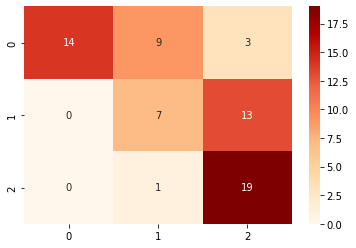

In [146]:
import sklearn.metrics

y_true = y_test
y_pred = y_classes

r = sklearn.metrics.confusion_matrix(y_true, y_pred)
sn.heatmap(r, annot=True,cmap="OrRd")
plt.savefig("Random_oversampler1"+ ".jpg", dpi = 600)
print(r)

In [147]:
from sklearn.metrics import balanced_accuracy_score
y_true = y_test
y_pred = y_classes
balanced_accuracy_score(y_true, y_pred)

0.6128205128205128

In [148]:
from imblearn.metrics import geometric_mean_score
y_true = y_test
y_pred = y_classes
# geometric_mean_score(y_true, y_pred)
geometric_mean_score(y_true, y_pred, average='macro')

0.7052386657171068

# ENSEMBLE METHODS

# EasyEnsembleClassifier

In [149]:
# import seaborn as sns 
# sns.countplot(np.array(trainTraditionalLabel))

In [150]:
# trainTraditional.shape

In [151]:
# ReX_train = trainTraditional.reshape(140, 32 *32 * 3)

In [152]:
# ReX_train.shape

In [153]:
# reshaped_testx = x_test.reshape(66, 32 *32 * 3)

In [154]:
# reshaped_trainx = ReX_train.reshape(len(trainTraditional),32 *32 * 3)
# reshaped_testx = x_test.reshape(len(x_test),32 *32 * 3)

In [155]:
# from imblearn.ensemble import EasyEnsembleClassifier 
# sm =  EasyEnsembleClassifier(random_state=42)
# sm.fit(reshaped_trainx, trainTraditionalLabel)

In [156]:
# y_pred = sm.predict(x_test)

In [157]:
# import sklearn.metrics
# from sklearn.metrics import confusion_matrix
# print(confusion_matrix(y_test, y_pred))

In [158]:
# "accuracy >> {}".format(sm.evaluate(np.array(x_test), np.array(y_test), verbose=0)[1])  

In [159]:
# import seaborn as sns 
# sns.countplot(np.array(y_smote))

In [160]:
# ImagesData = []
# Labels = []

# for x,y in zip(X_smote,y_smote):
#     ImagesData.append(x.reshape(32,32,3))
#     Labels.append(y)

In [161]:
# ImagesData[0].shape,np.array(Labels[:]).shape

In [162]:
# Classes = 10
# LR = 0.000009
# import tensorflow as tf
# import numpy as np
# %matplotlib inline
# import matplotlib.pyplot as plt 
# from random import randint
# batch_size = 64

In [163]:
# def create_classical_model():
#     # A simple model based off LeNet from https://keras.io/examples/mnist_cnn/
#     model = tf.keras.Sequential()
#     model.add(tf.keras.layers.Conv2D(32, [3, 3], activation='relu', input_shape=(32,32,3)))
#     model.add(tf.keras.layers.Conv2D(64, [3, 3], activation='relu'))
#     model.add(tf.keras.layers.MaxPooling2D(pool_size=(2, 2)))
#     model.add(tf.keras.layers.Dropout(0.25))
#     model.add(tf.keras.layers.Flatten()
#     )
#     model.add(tf.keras.layers.Dense(128, activation='relu'))
#     model.add(tf.keras.layers.Dropout(0.5))
#     model.add(tf.keras.layers.Dense(10))
#     return model


# model = create_classical_model()



# optimizer = tf.keras.optimizers.Adam()
# # optimizer.learning_rate.assign(0.00001)





# model.compile(loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
#               optimizer=optimizer,
#               metrics=['accuracy'])



# # upto = int(min_working_no *.7)
# # print(upto)
# history2 = model.fit(np.array(ImagesData[:]),
#         np.array(Labels[:]),
#         epochs=100,
#         )


In [164]:
# "accuracy >> {}".format(model.evaluate(np.array(x_test), np.array(y_test), verbose=0)[1])  

In [165]:
# # preds = model.predict(np.array(x_test))
# y_prob = model.predict(np.array(x_test)) 
# y_classes = y_prob.argmax(axis=-1)

In [166]:
# from sklearn.metrics import classification_report


# # report = classification_report(np.array(y_test), np.array(predictions).argmax(axis=-1))
# # print(report)
# report = classification_report(y_test, y_classes)
# print(report)

In [167]:
# import sklearn.metrics

# y_true = y_test
# y_pred = y_classes

# r = sklearn.metrics.confusion_matrix(y_true, y_pred)
# print(r)

In [168]:
# from sklearn.metrics import balanced_accuracy_score
# y_true = y_test
# y_pred = y_classes
# balanced_accuracy_score(y_true, y_pred)

In [169]:
# from imblearn.metrics import geometric_mean_score
# y_true = y_test
# y_pred = y_classes
# # geometric_mean_score(y_true, y_pred)
# geometric_mean_score(y_true, y_pred, average='macro')

# BalancedBaggingClassifier

In [170]:
# import seaborn as sns 
# sns.countplot(np.array(trainTraditionalLabel))

In [171]:
# trainTraditional.shape

In [172]:
# ReX_train = trainTraditional.reshape(175, 32 *32 * 3)

In [173]:
# ReX_train.shape

In [174]:
# from imblearn.ensemble import BalancedBaggingClassifier  
# sm =  BalancedBaggingClassifier(random_state=42)
# sm.fit(ReX_train, trainTraditionalLabel)

In [175]:
# preds = model.predict(np.array(x_test))
# y_prob = sm.predict(x_test) 
# y_classes = y_prob.argmax(axis=-1)

In [176]:
# from sklearn.metrics import classification_report


# # report = classification_report(np.array(y_test), np.array(predictions).argmax(axis=-1))
# # print(report)
# report = classification_report(y_test, y_classes)
# print(report)

In [177]:
# import sklearn.metrics

# y_true = y_test
# y_pred = y_classes

# r = sklearn.metrics.confusion_matrix(y_true, y_pred)
# print(r)

In [178]:
# from sklearn.metrics import balanced_accuracy_score
# y_true = y_test
# y_pred = y_classes
# balanced_accuracy_score(y_true, y_pred)

In [179]:
# from imblearn.metrics import geometric_mean_score
# y_true = y_test
# y_pred = y_classes
# # geometric_mean_score(y_true, y_pred)
# geometric_mean_score(y_true, y_pred, average='macro')






# Deep smote

In [180]:
# import IPython

# IPython.Application.instance().kernel.do_shutdown(True)

In [181]:
# !conda activate pytorch

In [182]:
import collections
import torch
import torch.nn as nn
from torch.autograd import Variable

from torch.utils.data import TensorDataset, DataLoader
from torchvision import datasets, transforms
from tqdm import tqdm
import numpy as np
import pandas as pd
from sklearn import manifold
import matplotlib.pyplot as plt
import seaborn as sns
import PIL
from datetime import datetime
from imblearn.metrics import geometric_mean_score
from imblearn.metrics import classification_report_imbalanced
from sklearn.metrics import precision_score
from sklearn.metrics import f1_score
from sklearn.metrics import accuracy_score
from sklearn.neighbors import NearestNeighbors, KNeighborsClassifier
from sklearn.utils import shuffle
import time

In [183]:
path = 'C:\\Users\\Research6\\Desktop\\smote experimentation\\Covid19-dataset\\train'

In [184]:
# # (x_train, y_train), (x_test, y_test) = tf.keras.datasets.mnist.load_data()
# (x_train, y_train), (x_test, y_test) = tf.keras.datasets.fashion_mnist.load_data()

# # (x_test, y_test) = (x_test[:20], y_test[:20])

# # Rescale the images from [0,255] to the [0.0,1.0] range.
# x_train, x_test = x_train[..., np.newaxis]/255.0, x_test[..., np.newaxis]/255.0 

# print("Number of original training examples:", len(x_train))
# print("Number of original test examples:", len(x_test))

In [185]:
"""args for AE"""

args = {}
args['dim_h'] = 64          # factor controlling size of hidden layers
args['n_channel'] = 3       # number of channels in the input data 

args['n_z'] = 600     # number of dimensions in latent space. 

args['sigma'] = 1.0        # variance in n_z
args['lambda'] = 0.01      # hyper param for weight of discriminator loss
args['lr'] = 0.0002        # learning rate for Adam optimizer .000
args['epochs'] = 1 #50         # how many epochs to run for
args['batch_size'] = 100   # batch size for SGD
args['save'] = True        # save weights at each epoch of training if True
args['train'] = True       # train networks if True, else load networks from

args['dataset'] = 'mnist' #'fmnist' # specify which dataset to use

# dec_x = pd.read_csv(".../cif_inp_dsm_imbal.csv")
# dec_y = pd.read_csv(".../cif_tar_dsm_imbal.csv")
# dec_x = pd.read_csv(path+"/images.txt")
# dec_y = pd.read_csv(path+"/labels.txt")

dec_x = np.loadtxt(path+"/images.txt")
dec_y = np.loadtxt(path+"/labels.txt")

# dec_x = dec_x.to_numpy()
# dec_y = dec_y.to_numpy()
# dec_y = np.squeeze(dec_y)
# dec_y.shape

print('train imgs before reshape ',dec_x.shape) 
print('train labels ',dec_y.shape) 
# print(dec_x.shape[0]/(3))

dec_x = dec_x.reshape(dec_x.shape[0]//(32*32*3),3,32,32)
# dec_x = dec_x.reshape(dec_x.shape[0]//(64*64*3),3,64,64) 
# dec_x = dec_x.reshape(dec_x.shape[0],3,32,32)  
# print(dec_x.shape[0]," << Shape >> ",dec_x.shape[0]//(32*32*3))
print(dec_x.shape)


batch_size_tr = args['batch_size']



num_workers = 0

print(collections.Counter(dec_y))

tensor_x = torch.Tensor(dec_x)
tensor_y = torch.tensor(dec_y,dtype=torch.long)

cifar_bal = TensorDataset(tensor_x,tensor_y) 

train_loader = torch.utils.data.DataLoader(cifar_bal, 
        batch_size=batch_size_tr,shuffle=True,num_workers=num_workers)

classes = ('0', '1','2')


train imgs before reshape  (645120,)
train labels  (210,)
(210, 3, 32, 32)
Counter({1.0: 70, 2.0: 70, 0.0: 70})


In [186]:
##################################################################
"""mini training set for model testing purposes"""

decxtst = dec_x[:200]
decytst = dec_y[:200]

tensor_x = torch.Tensor(decxtst)
tensor_y = torch.tensor(decytst,dtype=torch.long)

tentst = TensorDataset(tensor_x,tensor_y) 

train_loadtst = torch.utils.data.DataLoader(tentst, 
        batch_size=batch_size_tr,num_workers=num_workers)

In [187]:
## create encoder model and decoder model
class WAE_Encoder(nn.Module):
    def __init__(self, args):
        super(WAE_Encoder, self).__init__()

        self.n_channel = args['n_channel']
        self.dim_h = args['dim_h']
        self.n_z = args['n_z']
        
        # convolutional filters, work excellent with image data
        self.conv = nn.Sequential(
            nn.Conv2d(self.n_channel, self.dim_h, 4, 2, 1, bias=False),
            
            nn.LeakyReLU(0.2, inplace=True),
            nn.Conv2d(self.dim_h, self.dim_h * 2, 4, 2, 1, bias=False),
            nn.BatchNorm2d(self.dim_h * 2),
            
            nn.LeakyReLU(0.2, inplace=True),
            nn.Conv2d(self.dim_h * 2, self.dim_h * 4, 4, 2, 1, bias=False),
            nn.BatchNorm2d(self.dim_h * 4),
            
            nn.LeakyReLU(0.2, inplace=True),
            
            
            nn.Conv2d(self.dim_h * 4, self.dim_h * 8, 4, 1, 0, bias=False),
            
            nn.BatchNorm2d(self.dim_h * 8), 
            
            nn.LeakyReLU(0.2, inplace=True) )
            
        # final layer is fully connected
        self.fc = nn.Linear(self.dim_h * (2 ** 3), self.n_z)
        

    def forward(self, x):
        
        x = self.conv(x)
        
        x = x.squeeze()
        
        x = self.fc(x)
        
        return x

class WAE_Decoder(nn.Module):
    def __init__(self, args):
        super(WAE_Decoder, self).__init__()

        self.n_channel = args['n_channel']
        self.dim_h = args['dim_h']
        self.n_z = args['n_z']

        self.main = nn.Sequential(
            # input is Z, going into a convolution
            nn.ConvTranspose2d( self.n_z, self.dim_h * 8, 4, 1, 0, bias=False),
            nn.BatchNorm2d(self.dim_h * 8),
            nn.ReLU(True),
            
            nn.ConvTranspose2d(self.dim_h * 8, self.dim_h * 4, 4, 2, 1, bias=False),
            nn.BatchNorm2d(self.dim_h * 4),
            nn.ReLU(True),
            
            nn.ConvTranspose2d( self.dim_h * 4, self.dim_h * 2, 4, 2, 1, bias=False),
            nn.BatchNorm2d(self.dim_h * 2),
            nn.ReLU(True),
            
            nn.ConvTranspose2d( self.dim_h * 2, self.n_channel, 4, 2, 1, bias=False),
            
            
            nn.Tanh()
           
        )

    def forward(self, input):
        
        return self.main(input)



In [188]:
##############################################################################
"""set models, loss functions"""
# control which parameters are frozen / free for optimization
def free_params(module: nn.Module):
    for p in module.parameters():
        p.requires_grad = True

def frozen_params(module: nn.Module):
    for p in module.parameters():
        p.requires_grad = False

# instantiate discriminator model, and restart encoder and decoder, for 
# fairness. Set to train mode, etc
wae_encoder = WAE_Encoder(args)
wae_decoder = WAE_Decoder(args)

device = 'cuda' if torch.cuda.is_available() else 'cpu'
print(device)
wae_decoder = wae_decoder.to(device)
wae_encoder = wae_encoder.to(device)

train_on_gpu = torch.cuda.is_available()

#decoder loss function
criterion = nn.MSELoss()
criterion = criterion.to(device)

cuda


In [189]:
##############################################################################
"""functions to create fake (SMOTE) images"""

def biased_get_class(c):
    
    xbeg = dec_x[dec_y == c]
    ybeg = dec_y[dec_y == c]
    
    
    return xbeg, ybeg
    


def G_SM(X, y,n_to_sample,cl):

    
    n_neigh = 5 + 1
    nn = NearestNeighbors(n_neighbors=n_neigh, n_jobs=1)
    nn.fit(X)
    dist, ind = nn.kneighbors(X)

    # generating samples
    base_indices = np.random.choice(list(range(len(X))),n_to_sample)
    neighbor_indices = np.random.choice(list(range(1, n_neigh)),n_to_sample)

    X_base = X[base_indices]
    X_neighbor = X[ind[base_indices, neighbor_indices]]

    samples = X_base + np.multiply(np.random.rand(n_to_sample,1),
            X_neighbor - X_base)

    #use 10 as label because 0 to 9 real classes and 1 fake/smoted = 10
    return samples, [cl]*n_to_sample




In [190]:
# from google.colab import drive
# drive.mount('/content/gdrive')

In [191]:
# shape[0],shape[3],shape[1],shape[2]

In [192]:


best_loss = np.inf

args['epochs'] = 35

t0 = time.time()
if args['train']:
    enc_optim = torch.optim.Adam(wae_encoder.parameters(), lr = args['lr'])
    dec_optim = torch.optim.Adam(wae_decoder.parameters(), lr = args['lr'])
    
    for epoch in range(args['epochs']):
        train_loss = 0.0
        tmse_loss = 0.0
        tdiscr_loss = 0.0
        
        wae_encoder.train()
        wae_decoder.train()
        
        for images,labs in train_loader:
        
            
            # zero gradients for each batch
            wae_encoder.zero_grad()
            wae_decoder.zero_grad()

            images, labs = images.to(device), labs.to(device)
            
            labsn = labs.detach().cpu().numpy()
            

            """reconstruction loss on real"""
            # run images
            z_hat = wae_encoder(images)
            
            
            z_hat = z_hat.view(z_hat.size()[0], z_hat.size()[1], 1, 1)
            
            x_hat = wae_decoder(z_hat) 
        
            mse = criterion(x_hat,images)
           
            
            """generator loss"""
            resx = []
            resy = []
            
           
            tc = np.random.choice(2,1)
            
            xbeg = dec_x[dec_y == tc]
            ybeg = dec_y[dec_y == tc] 
            xlen = len(xbeg)
            nsamp = min(xlen, 100)
            ind = np.random.choice(list(range(len(xbeg))),nsamp,replace=False)
            xclass = xbeg[ind]
            yclass = ybeg[ind]
            
            
            
            xclen = len(xclass)
            
            xcminus = np.arange(1,xclen)
            
            xcplus = np.append(xcminus,0)
            
            xcnew = (xclass[[xcplus],:])
            xcnew = np.squeeze(xcnew)
           
            
            xcnew = torch.Tensor(xcnew)
            xcnew = xcnew.to(device)
            
            #encode xclass to feature space
            xclass = torch.Tensor(xclass)
            xclass = xclass.to(device)
            xclass = wae_encoder(xclass)
            
            
            xclass = xclass.detach().cpu().numpy()
            
            
            
            xc_enc = (xclass[[xcplus],:])
            xc_enc = np.squeeze(xc_enc)
            
            
            xc_enc = torch.Tensor(xc_enc)
            xc_enc = xc_enc.to(device)
            
            xc_enc = xc_enc.view(xc_enc.size()[0], xc_enc.size()[1], 1, 1)
                
            ximg = wae_decoder(xc_enc)
            
            
            mse2 = criterion(ximg,xcnew)
            
            
            comb_loss = mse2 + mse
            comb_loss.backward()
            
            enc_optim.step()
            dec_optim.step()
            
            train_loss += comb_loss.item()*images.size(0)
            tmse_loss += mse.item()*images.size(0)
            tdiscr_loss += mse2.item()*images.size(0)
            
                 
        
        train_loss = train_loss/len(train_loader)
        tmse_loss = tmse_loss/len(train_loader)
        tdiscr_loss = tdiscr_loss/len(train_loader)
        print('Epoch: {} \tTrain Loss: {:.6f} \tmse loss: {:.6f} \tmse2 loss: {:.6f}'.format(epoch,
                    train_loss,tmse_loss,tdiscr_loss))
        
        
        if train_loss < best_loss:
            print('Saving..')
            
#             path_enc = '.../cif_enc_best.pth'
#             path_dec = '.../cif_dec_best.pth'
            path_enc = path + '/cif_enc_best.pth'
            path_dec = path + '/cif_dec_best.pth'
            torch.save(wae_encoder.state_dict(), path_enc)
            torch.save(wae_decoder.state_dict(), path_dec)
        
            best_loss = train_loss
        
        

    
#     path_enc = '.../cif_enc.pth'
#     path_dec = '.../cif_dec.pth'
   
    
    
            
t1 = time.time()
print('time(min) ',(t1-t0)/60)            
 




Epoch: 0 	Train Loss: 2931089.023438 	mse loss: 1458709.778646 	mse2 loss: 1472379.179688
Saving..
Epoch: 1 	Train Loss: 2928342.994792 	mse loss: 1453134.733073 	mse2 loss: 1475208.326823
Saving..
Epoch: 2 	Train Loss: 2914568.020833 	mse loss: 1450881.861979 	mse2 loss: 1463686.087240
Saving..
Epoch: 3 	Train Loss: 2922346.132812 	mse loss: 1449671.822917 	mse2 loss: 1472674.309896
Epoch: 4 	Train Loss: 2911576.848958 	mse loss: 1448941.621094 	mse2 loss: 1462635.227865
Saving..
Epoch: 5 	Train Loss: 2910445.638021 	mse loss: 1448410.944010 	mse2 loss: 1462034.759115
Saving..
Epoch: 6 	Train Loss: 2918037.460938 	mse loss: 1448012.819010 	mse2 loss: 1470024.641927
Epoch: 7 	Train Loss: 2899655.312500 	mse loss: 1447743.854167 	mse2 loss: 1451911.328125
Saving..
Epoch: 8 	Train Loss: 2907674.322917 	mse loss: 1447533.222656 	mse2 loss: 1460140.970052
Epoch: 9 	Train Loss: 2917640.690104 	mse loss: 1447331.516927 	mse2 loss: 1470309.303385
Epoch: 10 	Train Loss: 2898465.546875 	mse los

Generate Samples

In [193]:
# -*- coding: utf-8 -*-


import collections
import torch
import torch.nn as nn
import numpy as np
from sklearn.neighbors import NearestNeighbors, KNeighborsClassifier
import pandas as pd

print(torch.version.cuda) #10.1

##############################################################################
"""args for AE"""

args = {}
args['dim_h'] = 64          # factor controlling size of hidden layers
args['n_channel'] = 3       # number of channels in the input data 

args['n_z'] = 600 #600     # number of dimensions in latent space. 

args['sigma'] = 1.0        # variance in n_z
args['lambda'] = 0.01      # hyper param for weight of discriminator loss
args['lr'] = 0.0002        # learning rate for Adam optimizer .000
args['epochs'] = 1 #50         # how many epochs to run for
args['batch_size'] = 100   # batch size for SGD
args['save'] = True        # save weights at each epoch of training if True
args['train'] = True       # train networks if True, else load networks from

args['dataset'] = 'mnist' #'fmnist' # specify which dataset to use

# dec_x = pd.read_csv(".../cif_inp_dsm_imbal.csv") #data
# dec_y = pd.read_csv(".../cif_tar_dsm_imbal.csv") #labels
dec_x = np.loadtxt(path + "/images.txt") #data
dec_y = np.loadtxt(path + "/labels.txt") #labels

# dec_x = dec_x.to_numpy()
# dec_y = dec_y.to_numpy()
# dec_y = np.squeeze(dec_y)
dec_y.shape

dec_x = dec_x.reshape(dec_x.shape[0]//(32*32*3),3,32,32)  
# dec_y.shape

11.3


In [194]:

## create encoder model and decoder model
class WAE_Encoder(nn.Module):
    def __init__(self, args):
        super(WAE_Encoder, self).__init__()

        self.n_channel = args['n_channel']
        self.dim_h = args['dim_h']
        self.n_z = args['n_z']
        
        # convolutional filters, work excellent with image data
        self.conv = nn.Sequential(
            nn.Conv2d(self.n_channel, self.dim_h, 4, 2, 1, bias=False),
            
            nn.LeakyReLU(0.2, inplace=True),
            nn.Conv2d(self.dim_h, self.dim_h * 2, 4, 2, 1, bias=False),
            nn.BatchNorm2d(self.dim_h * 2),
            
            nn.LeakyReLU(0.2, inplace=True),
            nn.Conv2d(self.dim_h * 2, self.dim_h * 4, 4, 2, 1, bias=False),
            nn.BatchNorm2d(self.dim_h * 4),
            
            nn.LeakyReLU(0.2, inplace=True),
            
            
            nn.Conv2d(self.dim_h * 4, self.dim_h * 8, 4, 1, 0, bias=False),
            
            nn.BatchNorm2d(self.dim_h * 8), 
            
            nn.LeakyReLU(0.2, inplace=True) )#,
            
        # final layer is fully connected
        self.fc = nn.Linear(self.dim_h * (2 ** 3), self.n_z)
        

    def forward(self, x):
        
        x = self.conv(x)
        
        x = x.squeeze()
        
        x = self.fc(x)
        
        return x

class WAE_Decoder(nn.Module):
    def __init__(self, args):
        super(WAE_Decoder, self).__init__()

        self.n_channel = args['n_channel']
        self.dim_h = args['dim_h']
        self.n_z = args['n_z']

        self.main = nn.Sequential(
            # input is Z, going into a convolution
            nn.ConvTranspose2d( self.n_z, self.dim_h * 8, 4, 1, 0, bias=False),
            nn.BatchNorm2d(self.dim_h * 8),
            nn.ReLU(True),
           
            nn.ConvTranspose2d(self.dim_h * 8, self.dim_h * 4, 4, 2, 1, bias=False),
            nn.BatchNorm2d(self.dim_h * 4),
            nn.ReLU(True),
            
            nn.ConvTranspose2d( self.dim_h * 4, self.dim_h * 2, 4, 2, 1, bias=False),
            nn.BatchNorm2d(self.dim_h * 2),
            nn.ReLU(True),
            
            nn.ConvTranspose2d( self.dim_h * 2, self.n_channel, 4, 2, 1, bias=False),
            
            nn.Tanh()
            
        )

    def forward(self, input):
        
        return self.main(input)


In [195]:
## create encoder model and decoder model
class Discriminator(nn.Module):
    def __init__(self, args):
        super(Discriminator, self).__init__()

        self.n_channel = args['n_channel']
        self.dim_h = args['dim_h']
        self.n_z = args['n_z']
        
        # convolutional filters, work excellent with image data
        self.conv = nn.Sequential(
            nn.Conv2d(self.n_channel, self.dim_h, 4, 2, 1, bias=False),
            
            nn.LeakyReLU(0.2, inplace=True),
            nn.Conv2d(self.dim_h, self.dim_h * 2, 4, 2, 1, bias=False),
            nn.BatchNorm2d(self.dim_h * 2),
            
            nn.LeakyReLU(0.2, inplace=True),
            nn.Conv2d(self.dim_h * 2, self.dim_h * 4, 4, 2, 1, bias=False),
            nn.BatchNorm2d(self.dim_h * 4),
            
            nn.LeakyReLU(0.2, inplace=True),
            
            nn.Conv2d(self.dim_h * 4, self.dim_h * 8, 4, 2, 0, bias=False),
            nn.BatchNorm2d(self.dim_h * 8), # 40 X 8 = 320
            
            nn.LeakyReLU(0.2, inplace=True))
        
        self.fc_1 = nn.Linear(self.dim_h * (2 ** 3), 10)

    def forward(self, x):
        
        x = self.conv(x)
        
        x = x.squeeze()
        
        x = self.fc_1(x)
        
        return x


In [196]:
##############################################################################

classes = ('0', '1','2')
np.printoptions(precision=5,suppress=True)

#generate some AE images for comparison
train_on_gpu = torch.cuda.is_available()
device = 'cuda' if torch.cuda.is_available() else 'cpu'


path_enc = path + '/cif_enc_best.pth'
path_dec = path + '/cif_dec_best.pth'




wae_encoder = WAE_Encoder(args)
wae_encoder.load_state_dict(torch.load(path_enc), strict=False)
wae_encoder =wae_encoder.to(device)

wae_decoder = WAE_Decoder(args)
wae_decoder.load_state_dict(torch.load(path_dec), strict=False)
wae_decoder = wae_decoder.to(device)

wae_encoder.eval()
wae_decoder.eval()

def biased_get_class1(c):
    
    xbeg = dec_x[dec_y == c]
    ybeg = dec_y[dec_y == c]
    
    return xbeg, ybeg
    


def G_SM1(X, y,n_to_sample,cl):

    
    # fitting the model
    n_neigh = 5 + 1
    nn = NearestNeighbors(n_neighbors=n_neigh, n_jobs=1)
    nn.fit(X)
    dist, ind = nn.kneighbors(X)

    # generating samples
    base_indices = np.random.choice(list(range(len(X))),n_to_sample)
    neighbor_indices = np.random.choice(list(range(1, n_neigh)),n_to_sample)

    X_base = X[base_indices]
    X_neighbor = X[ind[base_indices, neighbor_indices]]

    samples = X_base + np.multiply(np.random.rand(n_to_sample,1),
            X_neighbor - X_base)

    #use 10 as label because 0 to 9 real classes and 1 fake/smoted = 10
    return samples, [cl]*n_to_sample



In [197]:
imbal = [10,20,70]

In [198]:
resx = []
resy = []

for i in range(1,3):
    xclass, yclass = biased_get_class1(i)
    
    print(yclass[0]) 
            
    #encode xclass to feature space
    xclass = torch.Tensor(xclass)
    xclass = xclass.to(device)
    xclass = wae_encoder(xclass)
    
            
    xclass = xclass.detach().cpu().numpy()
#     n = imbal[0] - imbal[i]
    n = imbal[i] - imbal[0]
    xsamp, ysamp = G_SM1(xclass,yclass,n,i)
    
    ysamp = np.array(ysamp)
    
    

1.0
2.0


In [199]:
   """to generate samples for resnet"""
    
xsamp = torch.Tensor(xsamp)
xsamp = xsamp.to(device)
xsamp = xsamp.view(xsamp.size()[0], xsamp.size()[1], 1, 1)

ximg = wae_decoder(xsamp)

ximn = ximg.detach().cpu().numpy()

resx.append(ximn)
resy.append(ysamp)
    
    

resx1 = np.vstack(resx)
resy1 = np.hstack(resy)

print(resx1.shape) 
print(resy1.shape) 

resx1 = resx1.reshape(resx1.shape[0],-1)
print(resx1.shape) 

dec_x1 = dec_x.reshape(dec_x.shape[0],-1)
print('decx1 ',dec_x1.shape)
combx = np.vstack((resx1,dec_x1))
comby = np.hstack((resy1,dec_y))

print(combx.shape) 
print(comby.shape) 

ifile = path + '_trn_img.txt'
np.savetxt(ifile, combx)
    
lfile = path  + '_trn_lab.txt'
np.savetxt(lfile,comby) 
print()

t1 = time.time()

# t = combx.reshape(50000,-1)
# f = ".../cif_inp_dsm_balanced.csv"
# pdf = pd.DataFrame(t)
# pdf.to_csv(f,index=False)


# t = comby
# f = ".../cif_tar_dsm_balanced.csv"
# pdf = pd.DataFrame(t)
# pdf.to_csv(f,index=False)       





(60, 3, 32, 32)
(60,)
(60, 3072)
decx1  (210, 3072)
(270, 3072)
(270,)



In [200]:
# import numpy as np

In [201]:
arr = np.loadtxt(path + '_trn_img.txt')
labels = np.loadtxt(path  + '_trn_lab.txt')

In [202]:
ImagesData = []
Labels = []

for x,y in zip(arr,labels):
    ImagesData.append(x.reshape(32,32,3))
    Labels.append(y)

In [203]:
Labels[0]

2.0

In [204]:
ImagesData[0].shape,np.array(Labels[:]).shape

((32, 32, 3), (270,))

In [205]:
Classes = 3
# LR = 0.000001
import tensorflow as tf
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt 
from random import randint
batch_size = 64
Epoch = 100

In [206]:
def create_classical_model():
    # A simple model based off LeNet from https://keras.io/examples/mnist_cnn/
    model = tf.keras.Sequential()
    model.add(tf.keras.layers.Conv2D(32, [3, 3], activation='relu', input_shape=(32,32,3)))
    model.add(tf.keras.layers.Conv2D(64, [3, 3], activation='relu'))
    model.add(tf.keras.layers.MaxPooling2D(pool_size=(2, 2)))
    model.add(tf.keras.layers.Dropout(0.25))
    model.add(tf.keras.layers.Flatten()
    )
    model.add(tf.keras.layers.Dense(128, activation='relu'))
    model.add(tf.keras.layers.Dropout(0.5))
    model.add(tf.keras.layers.Dense(3))
    return model


model = create_classical_model()



optimizer = tf.keras.optimizers.Adam()
# optimizer.learning_rate.assign(0.00001)





model.compile(loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              optimizer=optimizer,
              metrics=['accuracy'])



# upto = int(min_working_no *.7)
# print(upto)
history2 = model.fit(np.array(ImagesData[:]),
        np.array(Labels[:]),
        epochs=100,
        )


Epoch 1/100
9/9 [==============================] - 0s 20ms/step - loss: 43.8284 - accuracy: 0.4148
Epoch 2/100
9/9 [==============================] - 0s 7ms/step - loss: 2.3459 - accuracy: 0.7667
Epoch 3/100
9/9 [==============================] - 0s 7ms/step - loss: 0.6605 - accuracy: 0.8593
Epoch 4/100
9/9 [==============================] - 0s 7ms/step - loss: 0.4220 - accuracy: 0.8481
Epoch 5/100
9/9 [==============================] - 0s 6ms/step - loss: 0.2351 - accuracy: 0.9185
Epoch 6/100
9/9 [==============================] - 0s 6ms/step - loss: 0.1506 - accuracy: 0.9593
Epoch 7/100
9/9 [==============================] - 0s 6ms/step - loss: 0.1805 - accuracy: 0.9407
Epoch 8/100
9/9 [==============================] - 0s 7ms/step - loss: 0.1313 - accuracy: 0.9444
Epoch 9/100
9/9 [==============================] - 0s 6ms/step - loss: 0.0734 - accuracy: 0.9778
Epoch 10/100
9/9 [==============================] - 0s 6ms/step - loss: 0.0416 - accuracy: 0.9889
Epoch 11/100
9/9 [=========

9/9 [==============================] - 0s 5ms/step - loss: 0.0020 - accuracy: 1.0000
Epoch 85/100
9/9 [==============================] - 0s 5ms/step - loss: 0.0261 - accuracy: 0.9926
Epoch 86/100
9/9 [==============================] - 0s 5ms/step - loss: 0.0011 - accuracy: 1.0000
Epoch 87/100
9/9 [==============================] - 0s 5ms/step - loss: 0.0046 - accuracy: 1.0000
Epoch 88/100
9/9 [==============================] - 0s 5ms/step - loss: 0.0060 - accuracy: 0.9963
Epoch 89/100
9/9 [==============================] - 0s 5ms/step - loss: 0.0042 - accuracy: 1.0000
Epoch 90/100
9/9 [==============================] - 0s 5ms/step - loss: 0.0034 - accuracy: 1.0000
Epoch 91/100
9/9 [==============================] - 0s 5ms/step - loss: 0.0027 - accuracy: 1.0000
Epoch 92/100
9/9 [==============================] - 0s 6ms/step - loss: 0.0026 - accuracy: 1.0000
Epoch 93/100
9/9 [==============================] - 0s 5ms/step - loss: 0.0030 - accuracy: 1.0000
Epoch 94/100
9/9 [===============

In [207]:
# model.compile(loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
#               optimizer=optimizer,
#               metrics=['accuracy'])


In [208]:

from glob import glob   

In [209]:
#Test Paths
covid_test_paths = glob('C:/Users/Research6/Desktop/smote experimentation/Covid19-dataset/test/Covid/**')
print(len(covid_test_paths))
Normal_test_paths = glob('C:/Users/Research6/Desktop/smote experimentation/Covid19-dataset/test/Normal/**')
print(len(Normal_test_paths))
ViralPneumonia_test_paths = glob('C:/Users/Research6/Desktop/smote experimentation/Covid19-dataset/test/Viral Pneumonia/**')
print(len(ViralPneumonia_test_paths))

26
20
20


In [210]:
image_dimensions = 32
import cv2 
data_test = [] 
label_test = [] 
# number_of_images
for c in (covid_test_paths):
  data_test.append(cv2.resize(cv2.imread(c),(image_dimensions,image_dimensions)))
  label_test.append(0)
for n in (Normal_test_paths):    
  data_test.append(cv2.resize(cv2.imread(n),(image_dimensions,image_dimensions)))
  label_test.append(1)
for v in (ViralPneumonia_test_paths):
  data_test.append(cv2.resize(cv2.imread(v),(image_dimensions,image_dimensions)))
  label_test.append(2)

In [211]:
len(data_test)

66

In [212]:
# x_train = data_train[:len(data_train)//2]
# y_train =  label_train[:len(label_train)//2]

x_test = data_test[:]
y_test =  label_test[:]

In [213]:
# len(x_train)

In [214]:
len(x_test)

66

In [215]:
"accuracy >> {}".format(model.evaluate(np.array(x_test), np.array(y_test), verbose=0)[1])  

'accuracy >> 0.8636363744735718'

In [216]:
# preds = model.predict(np.array(x_test))
y_prob = model.predict(np.array(x_test)) 
y_classes = y_prob.argmax(axis=-1)

In [217]:
y_classes[0]

0

In [218]:
from sklearn.metrics import classification_report


# report = classification_report(np.array(y_test), np.array(predictions).argmax(axis=-1))
# print(report)
report = classification_report(y_test, y_classes)
print(report)

              precision    recall  f1-score   support

           0       0.96      0.96      0.96        26
           1       0.84      0.80      0.82        20
           2       0.76      0.80      0.78        20

    accuracy                           0.86        66
   macro avg       0.86      0.85      0.85        66
weighted avg       0.86      0.86      0.86        66



In [219]:
# np.savetxt(experiment_Name+"_predicted_SMOTE.txt",y_classes)
# np.savetxt(experiment_Name+"_actual_SMOTE.txt",y_test)

[[25  0  1]
 [ 0 16  4]
 [ 1  3 16]]


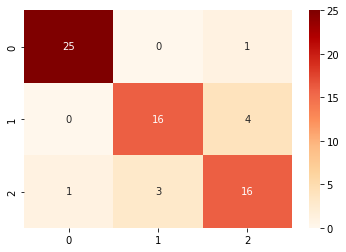

In [220]:
import sklearn.metrics

y_true = y_test
y_pred = y_classes

r = sklearn.metrics.confusion_matrix(y_true, y_pred)
sn.heatmap(r, annot=True,cmap="OrRd")
plt.savefig("Deep_smote1"+ ".jpg", dpi = 600)
print(r)

In [221]:
from sklearn.metrics import balanced_accuracy_score
y_true = y_test
y_pred = y_classes
balanced_accuracy_score(y_true, y_pred)

0.8538461538461538

In [222]:
from imblearn.metrics import geometric_mean_score
y_true = y_test
y_pred = y_classes
# geometric_mean_score(y_true, y_pred)
geometric_mean_score(y_true, y_pred, average='macro')




0.892878738391486

In [223]:
# import seaborn as sns
# imbal = [4000, 2000, 1000, 750, 500, 350, 200, 100, 60, 40]
# # sns.countplot(np.array(Labels))
# sns.distplot(np.array(imbal))

In [224]:
# from random import randint
# import seaborn_image as isns

# randomImages  = []
# for i in range(10): randomImages.append(randint(0,len(arr)-1))
# Imageset = []
# for x in randomImages:
#     Imageset.append((ImagesData[x][ : , : , 0])) 
#     print(Labels[x])
    
# g = isns.ImageGrid(Imageset)

In [225]:
# import tensorflow as tf
# import numpy as np
# %matplotlib inline
# import matplotlib.pyplot as plt
# import numpy as np

# from keras.callbacks import EarlyStopping

In [226]:
# def create_classical_model():
#     # A simple model based off LeNet from https://keras.io/examples/mnist_cnn/
#     model = tf.keras.Sequential()
#     model.add(tf.keras.layers.Conv2D(32, [3, 3], activation='relu', input_shape=(28,28,1)))
#     model.add(tf.keras.layers.Conv2D(64, [3, 3], activation='relu'))
#     model.add(tf.keras.layers.MaxPooling2D(pool_size=(2, 2)))
#     model.add(tf.keras.layers.Dropout(0.25))
#     model.add(tf.keras.layers.Flatten()
#     )
#     model.add(tf.keras.layers.Dense(128, activation='relu'))
#     model.add(tf.keras.layers.Dropout(0.5))
#     model.add(tf.keras.layers.Dense(10))
#     return model


# model = create_classical_model()


# optimizer = tf.keras.optimizers.Adam(0.01)
# optimizer.learning_rate.assign(0.00001)

# model.compile(loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
#               optimizer=optimizer,
#               metrics=['accuracy'])



# upto = int(min_working_no *.7)
# print(upto)
# # valUpto = int(min_working_no*.15)
# history2 = model.fit(np.array(ImagesData[:upto]),
#         np.array(Labels[:upto]),
#         # batch_size=128,
#         epochs=epoch,
#         # verbose=1,
#         validation_data=(np.array(ImagesData[upto:]), np.array(Labels[upto:]))
#         )

In [227]:
# "accuracy >> {}".format(model.evaluate(np.array(ImagesData), np.array(Labels), verbose=0)[1])

In [228]:
# from matplotlib import pyplot as plt
# lister = [1]
# for x in lister:
#   plt.imshow(X[x][ : ])
#   plt.show()

In [229]:

# def display_from_file(arr, idx):
#   all_data = np.loadtxt(arr, delimiter="\t",
#     usecols=range(0,785), dtype=np.int64)
#   x_data = all_data[:,0:784]  # all rows, 784 cols
#   x_data

In [230]:
# # pixels = x_data[idx]
# pixels = arr.reshape((28,28))